In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.utils import io
from PyEyeSim import EyeData

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0, dtype={'subject': str})
print(np.shape(FixData))

(265703, 12)


In [4]:
# delete every row where the repetition is not 0 and record_number is not 0
FixData=FixData[FixData['repetition']==0]
FixData=FixData[FixData['record_number']==0]
# remove every fixation that has position x or y lower than 0
FixData=FixData[FixData['fix_x']>0]
FixData=FixData[FixData['fix_y']>0]
print(np.shape(FixData))

(257808, 12)


dataset size:  (257808, 12)
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 200 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis
Data for  200 observers and  36  stimuli.


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\__init__.py:281: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Mean fixation number:  36.78  +/-  9.92
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  477.2  +/-  93.0  pixels
Mean Y location:  465.6  +/-  64.8  pixels
Mean saccade  amplitude:  78.6  +/-  18.6  pixels
Mean scanpath  length:  2427.3  +/-  529.8  pixels
Data for  200 observers and  36  stimuli.
Mean fixation number:  36.78  +/-  9.92
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  477.2  +/-  93.0  pixels
Mean Y location:  465.6  +/-  64.8  pixels
Mean saccade  amplitude:  78.6  +/-  18.6  pixels
Mean scanpath  length:  2427.3  +/-  529.8  pixels


(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30, 8881, 8882, 8883,
        8884, 8885, 8886], dtype=int64),
 array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
        '21498', '21513', '21522', '21526', '21531', '21568', '21629',
        '21630', '21636', '21641', '21653', '21658', '21667', '21680',
        '21683', '21685', '21699', '21706', '21735', '21774', '21811',
        '21819', '21820', '21862', '21878', '21889', '21927', '21930',
        '21939', '21946', '22018', '22036', '22108', '22109', '22127',
        '22129', '22138', '22149', '22168', '22174', '22180', '22181',
        '22186', '22204', '22214', '22219', '22228', '22234', '22239',
        '22242', '22261', '22271', '22279', '22291', '22322', '22324',
        '22327', '22341', '22346', '22376', '22378', '22383', '22388',
        '22394', '22410', '

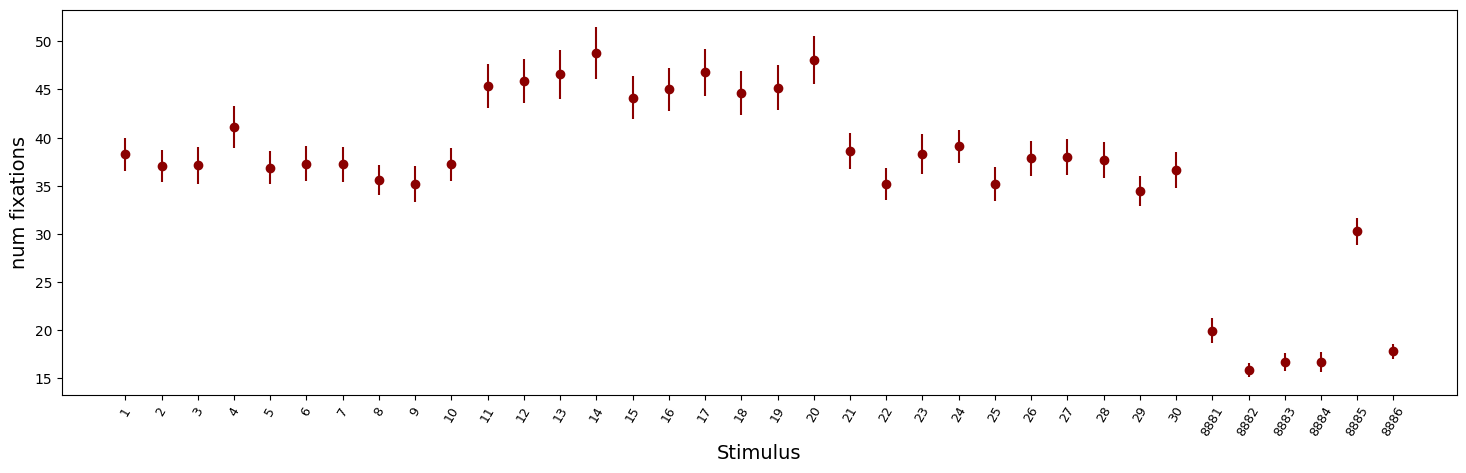

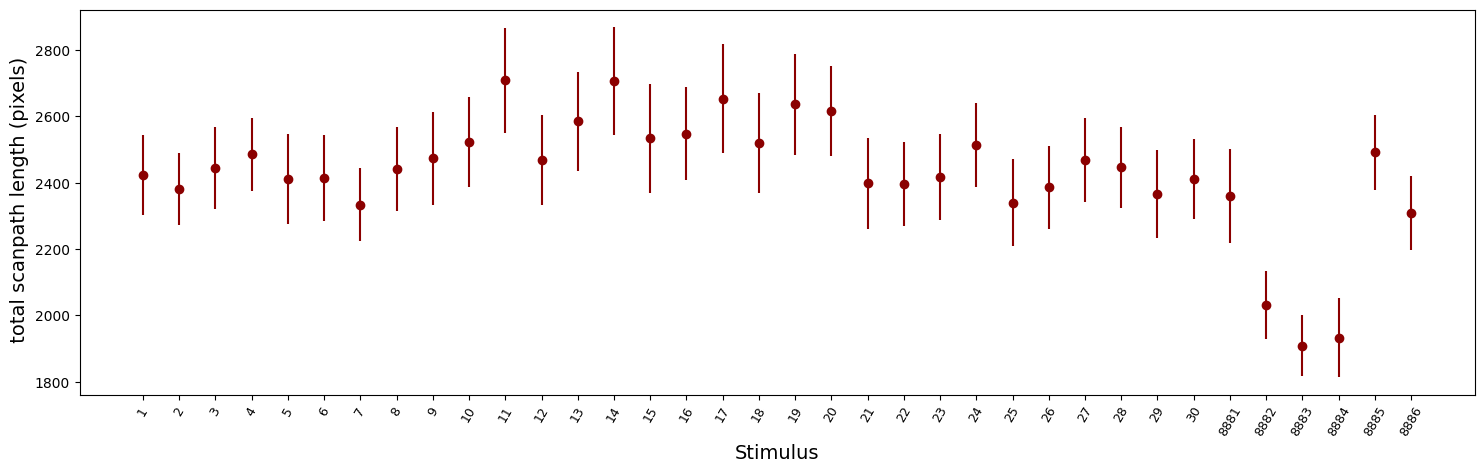

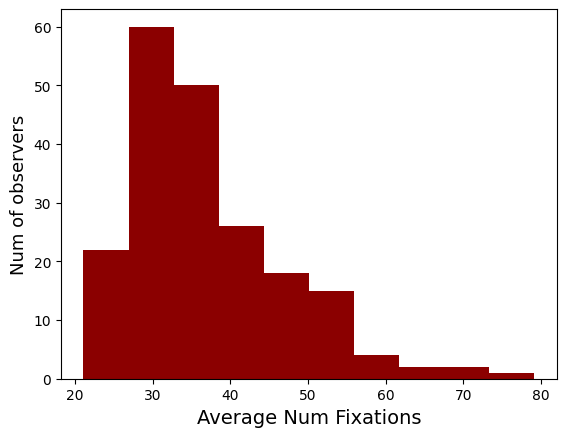

In [5]:

sizeX,sizeY=1280, 960


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')
DyslexiaDat.RunDescriptiveFix(Visual=1)

---

In [6]:
complete_data = []
missing_data = {}
subject_with_missing_data = {}
set_subj = set()
map_stim_subj = {}
for i in range(0,36):
    FixGr=np.array(DyslexiaDat.nfix[117:,i])
    if not np.isnan(FixGr).any():
        complete_data.append(i)
    if np.isnan(FixGr).any():
        missing_data[i] = np.isnan(FixGr).sum()
        for x in np.where(np.isnan(FixGr))[0]:
            subject_with_missing_data[117+x] = +1
            map_stim_subj[i] = map_stim_subj.get(i, []) + [DyslexiaDat.subjects[117+x]]
            set_subj.add(117+x)


print(f'{len(complete_data)} Stimuli with complete data: {complete_data}')
print(f'{len(missing_data)} Stimuli with Missing data: {missing_data}')
print(f'Max subject that have not seen the stimulus: {max(missing_data.values())}')
print(f'{len(subject_with_missing_data)} Subjects with missing data: {subject_with_missing_data}')

3 Stimuli with complete data: [7, 32, 33]
33 Stimuli with Missing data: {0: 1, 1: 3, 2: 3, 3: 1, 4: 4, 5: 3, 6: 4, 8: 1, 9: 7, 10: 6, 11: 7, 12: 3, 13: 2, 14: 4, 15: 4, 16: 6, 17: 3, 18: 3, 19: 4, 20: 4, 21: 2, 22: 7, 23: 4, 24: 4, 25: 3, 26: 2, 27: 5, 28: 5, 29: 3, 30: 5, 31: 6, 34: 8, 35: 5}
Max subject that have not seen the stimulus: 8
57 Subjects with missing data: {177: 1, 127: 1, 160: 1, 181: 1, 161: 1, 199: 1, 121: 1, 173: 1, 198: 1, 158: 1, 167: 1, 196: 1, 142: 1, 146: 1, 182: 1, 119: 1, 120: 1, 124: 1, 136: 1, 147: 1, 130: 1, 139: 1, 153: 1, 166: 1, 191: 1, 184: 1, 171: 1, 149: 1, 154: 1, 169: 1, 197: 1, 155: 1, 163: 1, 150: 1, 179: 1, 186: 1, 128: 1, 125: 1, 152: 1, 176: 1, 133: 1, 138: 1, 162: 1, 188: 1, 134: 1, 164: 1, 141: 1, 165: 1, 195: 1, 122: 1, 123: 1, 126: 1, 137: 1, 185: 1, 145: 1, 159: 1, 178: 1}


In [7]:
s = 0
for i in range(0,10):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the first 10 stimuli')

s = 0
for i in range(11,20):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the stimuli from 11 to 20 stimuli')

s = 0
for i in range(21,30):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the stimuli from 21 to 30 stimuli')

27 Subjects with missing data for the first 10 stimuli
36 Subjects with missing data for the stimuli from 11 to 20 stimuli
35 Subjects with missing data for the stimuli from 21 to 30 stimuli


Here we check for the Graz subjects, the amount of stimuli and subject that have some empty data. In other words, we check for every subjects wich and how many stimuli they have not seen (or have been delete because with repetition > 0 and record_number > 0)

Compared to the Munich data here it seems to be not possible to remove, either the stimuli with subject that have not seen them or the subjects that have not seen a specific stimulus.

The solution is to exclude dynamically the subjects that have not seen a specific stimulus.

---

In [8]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [9]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0
WhichCN = WhichCN.astype(int)
WhichCN

array([1, 4, 4, 3, 3, 3, 2, 4, 4, 4, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 4,
       3, 1, 1, 1, 4, 1, 4, 4, 3, 4, 0, 1, 1, 4, 4, 2, 1, 1, 2, 1, 4, 1,
       2, 3, 1, 2, 4, 1, 4, 3, 2, 2, 2, 1, 4, 1, 1, 1, 2, 3, 4, 4, 1, 2,
       4, 2, 1, 2, 1, 1, 1, 1, 3, 3, 2, 4, 2, 4, 1, 4, 2, 1, 2, 3, 3, 2,
       4, 1, 1, 3, 3, 1, 0, 1, 4, 4, 2, 0, 4, 4, 4, 3, 4, 2, 2, 1, 4, 4,
       4, 4, 4, 4, 3, 1, 1, 3, 4, 2, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4, 1, 2,
       1, 3, 1, 3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 3, 2, 4, 1, 1, 0, 4, 1, 4,
       1, 4, 4, 4, 4, 3, 1, 1, 4, 3, 3, 3, 1, 2, 4, 2, 3, 1, 4, 4, 3, 3,
       3, 2, 4, 4, 4, 4, 1, 3, 0, 0, 3, 2, 4, 4, 4, 4, 4, 1, 1, 3, 1, 4,
       4, 0])

In [10]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC

array([0, 3, 3, 2, 2, 2, 1, 3, 3, 3, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 3,
       2, 0, 0, 0, 3, 0, 3, 3, 2, 3, 4, 0, 0, 3, 3, 1, 0, 0, 1, 0, 3, 0,
       1, 2, 0, 1, 3, 0, 3, 2, 1, 1, 1, 0, 3, 0, 0, 0, 1, 2, 3, 3, 0, 1,
       3, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 0, 1, 2, 2, 1,
       3, 0, 0, 2, 2, 0, 4, 0, 3, 3, 1, 4, 3, 3, 3, 2, 3, 1, 1, 0, 3, 3,
       3, 3, 3, 3, 2, 0, 0, 2, 3, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 0, 1,
       0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 3, 3, 2, 1, 3, 0, 0, 4, 3, 0, 3,
       0, 3, 3, 3, 3, 2, 0, 0, 3, 2, 2, 2, 0, 1, 3, 1, 2, 0, 3, 3, 2, 2,
       2, 1, 3, 3, 3, 3, 0, 2, 4, 4, 2, 1, 3, 3, 3, 3, 3, 0, 0, 2, 0, 3,
       3, 4])

In [ ]:
from PyEyeSim.visualhelper import MeanPlot
from scipy import stats
def CompareGroupsFix(self,WhichC, class_labels=None):
    '''
    Description: Run a set of between-group fixation comparisons, generate plots, and print descriptive statistics.
    should work for 2-4 groups
    calculates:
    - number of fixations
    - entropy of fixations (potentially long run time)
    - total scanpath length
    - saccade amplitude

    prints descriptive stats of the above
    print pairwise comparison of groups with the above measures
    
    Arguments: 
    betwcond (str): Name of the conditions for between-group fixation comparisons.
    '''
    
    print('!runnning between group comparison')
    if hasattr(self,'entropies')==False:   # check if entropy has already been calculated
        print('Calculating entropy')
        Entropies,self.entropmax,self.entropies_ind=self.GetEntropies()
    Cols=['darkblue','cornflowerblue','darkred','orange','salmon']
    #plt.figure(figsize=(8,8))
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
    Entrs=[]
    Fixies=[]
    ScanpLs=[]
    SaccAmpls=[] 
    for cc,c in enumerate(self.Conds):
        if np.isnan(c):
            continue
        c = int(c)
        Idx=np.nonzero(WhichC==cc)[0]
        FixGr=np.array(self.nfix[Idx,:])
        EntrGr=self.entropies_ind[Idx,:]
        Entrs.append(np.nanmean(EntrGr,1))
        Fixies.append(np.nanmean(FixGr,1))
        ScanpLs.append(np.nanmean(self.len_scanpath[Idx,:],1))
        SaccAmpls.append(np.nanmean(self.sacc_ampl[Idx,:],1))
     
        print(cc,c,'num participants: ',len(Idx))

        print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))
        print(cc,c,'max num fix= ',np.round(np.max(np.nanmean(FixGr,1)),2))
        print(cc,c,'min num fix= ',np.round(np.min(np.nanmean(FixGr,1)),2))
        print(cc,c,'Entropy= ',np.round(np.mean(np.nanmean(EntrGr,1)),2),'+/-',np.round(np.std(np.nanmean(EntrGr,1)),2))
        print(cc,c,'tot scanpath len = ',np.round(np.mean(np.nanmean(self.len_scanpath[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.len_scanpath[Idx,:],1)),2),'pix')
        print(cc,c,'saccade amplitude = ',np.round(np.mean(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'pix')
        print('')
        MeanPlot(self.np,FixGr,yLab='Num Fixations',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,0])
        MeanPlot(self.np,EntrGr,yLab='Entropy',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,1])
        MeanPlot(self.np,self.len_scanpath[Idx,:],yLab='tot scanpath len (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,0])
        MeanPlot(self.np,self.sacc_ampl[Idx,:],yLab='saccade amplitude (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,1])
    
    
    plt.legend()
    plt.tight_layout()
    
    for gr1 in range(len(self.Conds)):
        if np.isnan(self.Conds[gr1]):
            continue
        for gr2 in range(len(self.Conds)):
            if np.isnan(self.Conds[gr2]):
                continue
            if gr1 < gr2:
                print()
                t,p=stats.ttest_ind(Entrs[gr1],Entrs[gr2])
                print(' ')
                print('Overall group differences: ',self.Conds[gr1],'vs',self.Conds[gr2] )
                print('Entropy t=',np.round(t,4),', p=',np.round(p,4))
                #if pglib:
                 #   pg.ttest(Fixies[0],Fixies[1],paired=False)
                #else:
                t,p=stats.ttest_ind(Fixies[gr1],Fixies[gr2])
                print('Num Fix t=',np.round(t,4),', p= ',np.round(p,4))
                t,p=stats.ttest_ind(ScanpLs[gr1],ScanpLs[gr2])
                
            
                print('Scanpath lengths t=',np.round(t,4),', p=',np.round(p,4))
                t,p=stats.ttest_ind(SaccAmpls[gr1],SaccAmpls[gr2])
            
                print('Saccade amplitudes t=',np.round(t,4),', p=',np.round(p,4))
                print(' ')

    
    return 

!runnning between group comparison
Calculating entropy
resolution x = 1280  y = 960
0 1 4.35 maximum entropy 6.16
resolution x = 1280  y = 960
1 2 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
2 3 4.3 maximum entropy 6.16
resolution x = 1280  y = 960
3 4 4.4 maximum entropy 6.16
resolution x = 1280  y = 960
4 5 4.42 maximum entropy 6.16
resolution x = 1280  y = 960
5 6 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
6 7 4.36 maximum entropy 6.16
resolution x = 1280  y = 960
7 8 4.34 maximum entropy 6.16
resolution x = 1280  y = 960
8 9 4.42 maximum entropy 6.16
resolution x = 1280  y = 960
9 10 4.31 maximum entropy 6.16
resolution x = 1280  y = 960
10 11 4.3 maximum entropy 6.16
resolution x = 1280  y = 960
11 12 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
12 13 4.33 maximum entropy 6.16
resolution x = 1280  y = 960
13 14 4.31 maximum entropy 6.16
resolution x = 1280  y = 960
14 15 4.29 maximum entropy 6.16
resolution x = 1280  y = 960
15 16 4.37 maximum entr

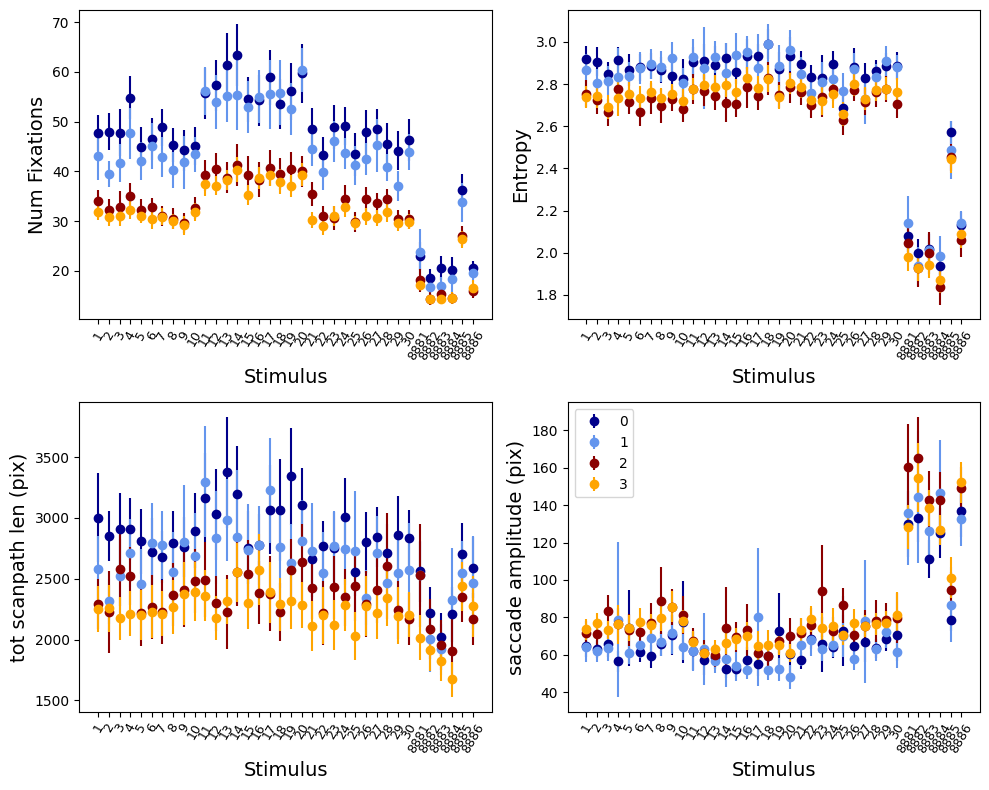

In [24]:
CompareGroupsFix(DyslexiaDat, WhichC, class_labels=['0','1','2','3'])

In [11]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [12]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC[WhichC == 0] = 1
WhichC[WhichC == 2] = 0
WhichC[WhichC == 3] = 0
WhichC[WhichC == 4] = 0
WhichC

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [13]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0 
WhichCN = WhichCN.astype(int)
# Trasform all 4 in 0
WhichCN[WhichCN == 4] = 0
WhichCN[WhichCN == 3] = 0
# Trasform all 1,2 in 1
WhichCN[WhichCN == 2] = 1
WhichCN

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [29]:
from PyEyeSim.visualhelper import MeanPlot
from scipy import stats
def CompareGroupsFix(self,WhichC, class_labels=None):
    '''
    Description: Run a set of between-group fixation comparisons, generate plots, and print descriptive statistics.
    should work for 2-4 groups
    calculates:
    - number of fixations
    - entropy of fixations (potentially long run time)
    - total scanpath length
    - saccade amplitude

    prints descriptive stats of the above
    print pairwise comparison of groups with the above measures
    
    Arguments: 
    betwcond (str): Name of the conditions for between-group fixation comparisons.
    '''
    
    print('!runnning between group comparison')
    if hasattr(self,'entropies')==False:   # check if entropy has already been calculated
        print('Calculating entropy')
        Entropies,self.entropmax,self.entropies_ind=self.GetEntropies()
    Cols=['darkblue','cornflowerblue','darkred','orange','salmon']
    #plt.figure(figsize=(8,8))
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
    Entrs=[]
    Fixies=[]
    ScanpLs=[]
    SaccAmpls=[] 
    for cc,c in enumerate(class_labels):
        c = int(c)
        Idx=np.nonzero(WhichC==cc)[0]
        FixGr=np.array(self.nfix[Idx,:])
        EntrGr=self.entropies_ind[Idx,:]
        Entrs.append(np.nanmean(EntrGr,1))
        Fixies.append(np.nanmean(FixGr,1))
        ScanpLs.append(np.nanmean(self.len_scanpath[Idx,:],1))
        SaccAmpls.append(np.nanmean(self.sacc_ampl[Idx,:],1))
     
        print(cc,c,'num participants: ',len(Idx))

        print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))
        print(cc,c,'max num fix= ',np.round(np.max(np.nanmean(FixGr,1)),2))
        print(cc,c,'min num fix= ',np.round(np.min(np.nanmean(FixGr,1)),2))
        print(cc,c,'Entropy= ',np.round(np.mean(np.nanmean(EntrGr,1)),2),'+/-',np.round(np.std(np.nanmean(EntrGr,1)),2))
        print(cc,c,'tot scanpath len = ',np.round(np.mean(np.nanmean(self.len_scanpath[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.len_scanpath[Idx,:],1)),2),'pix')
        print(cc,c,'saccade amplitude = ',np.round(np.mean(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'pix')
        print('')
        MeanPlot(self.np,FixGr,yLab='Num Fixations',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[0,0])
        MeanPlot(self.np,EntrGr,yLab='Entropy',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[0,1])
        MeanPlot(self.np,self.len_scanpath[Idx,:],yLab='tot scanpath len (pix)',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[1,0])
        MeanPlot(self.np,self.sacc_ampl[Idx,:],yLab='saccade amplitude (pix)',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[1,1])
    
    
    plt.legend()
    plt.tight_layout()

    return 

!runnning between group comparison
0 0 num participants:  119
0 0 Num fix=  31.52 +/- 6.06
0 0 max num fix=  68.45
0 0 min num fix=  21.14
0 0 Entropy=  2.63 +/- 0.17
0 0 tot scanpath len =  2300.54 +/- 531.55 pix
0 0 saccade amplitude =  84.34 +/- 20.42 pix

1 1 num participants:  81
1 1 Num fix=  44.77 +/- 9.27
1 1 max num fix=  79.17
1 1 min num fix=  30.09
1 1 Entropy=  2.74 +/- 0.17
1 1 tot scanpath len =  2748.51 +/- 508.78 pix
1 1 saccade amplitude =  73.46 +/- 15.18 pix



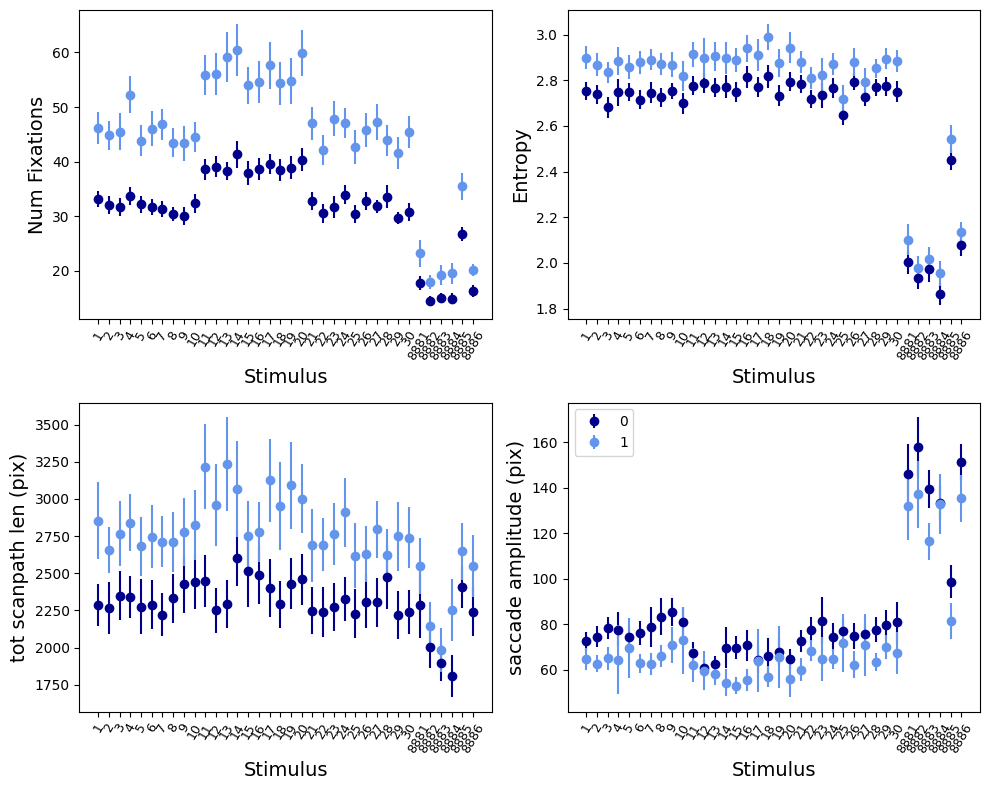

In [30]:
CompareGroupsFix(DyslexiaDat, WhichC, class_labels=['0','1'])

In [31]:
Idx=np.nonzero(WhichC==1)[0]
FixGr=np.array(DyslexiaDat.nfix[Idx,19])
print(FixGr)
#remove nan values
FixGr = FixGr[~np.isnan(FixGr)]
print('max num fix= ',np.max(FixGr))
print('min num fix= ',np.min(FixGr))
print('average num fix= ',np.mean(FixGr))

[ 17.  53.  72.  48.  42.  93.  51.  62.  48.  56.  59.  70.  49.  73.
  69.  50.  53.  54.  42.  57.  nan  54.  66.  52.  34.  47.  78. 107.
  50.  54.  41.  49.  29.  49.  52.  82.  62.  61.  58.  98.  85.  67.
  71.  49.  nan  39.  49.  70.  68. 102.  69.  40.  44.  53.  58.  67.
  64. 104.  57.  96.  65.  76.  65.  64.  69.  39.   9.  nan  77.  nan
  43.  76.  58.  84.  46.  60.  61.  74.  41.  49.  65.]
max num fix=  107.0
min num fix=  9.0
average num fix=  59.922077922077925


In [32]:
Idx=np.nonzero(WhichC==0)[0]
FixGr=np.array(DyslexiaDat.nfix[Idx,19])
print(FixGr)
# remove 1 max and 1 min value
FixGr = FixGr[~np.isnan(FixGr)]
print('max num fix= ',np.max(FixGr))
print('min num fix= ',np.min(FixGr))
print('average num fix= ',np.mean(FixGr))

[43. 45. 32. 46. 30. 56. 27. 32. 53. 40. 33. 49. 54. 41. 47. 33. 73. 25.
 29. 45. 99. 31. 48. 28. 43. 50. 25. 48. 50. 32. 38. 31. 51. 28. 27. 29.
 35. 38. 32. 50. 35. 45. 45. 30. 48. 37. 54. 52. 42. 42. 51. 42. 33. 40.
 38. 38. 42. 37. 32. 27. 42. 40. 40. 28. 37. 26. nan 44. 51. 39. 45. 46.
 34. 34. 38. 49. 52. 57. 40. 33. 36. 42. 58. 46. 30. 32. 37. 51. 41. 31.
 77. 46. 38. 36. 33. 48. 43. 50. 42. 24. 28. nan 20. 29. 24. 35. 30. 38.
 56. 39. 38. 34. 35. 39. 47. 30. 44. 39. 45.]
max num fix=  99.0
min num fix=  20.0
average num fix=  40.35897435897436


In [14]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=1)

In [12]:
def angles_entropy(angles, bins):
    hist, _ = np.histogram(angles, bins=bins)
    hist = hist / hist.sum()
    return -np.sum(hist * np.log2(hist))

In [67]:
Saccades = Saccades[0:117, :]
WhichC_Munich = WhichC[0:117]

Group 0
Angle Entropy: 7.114319960071477
---------------------------------------------------------
Group 1
Angle Entropy: 7.396763654882683
---------------------------------------------------------
 
t-test between groups 0 and 1
t: -1.559467845302823, p: 0.11888775137063351
 


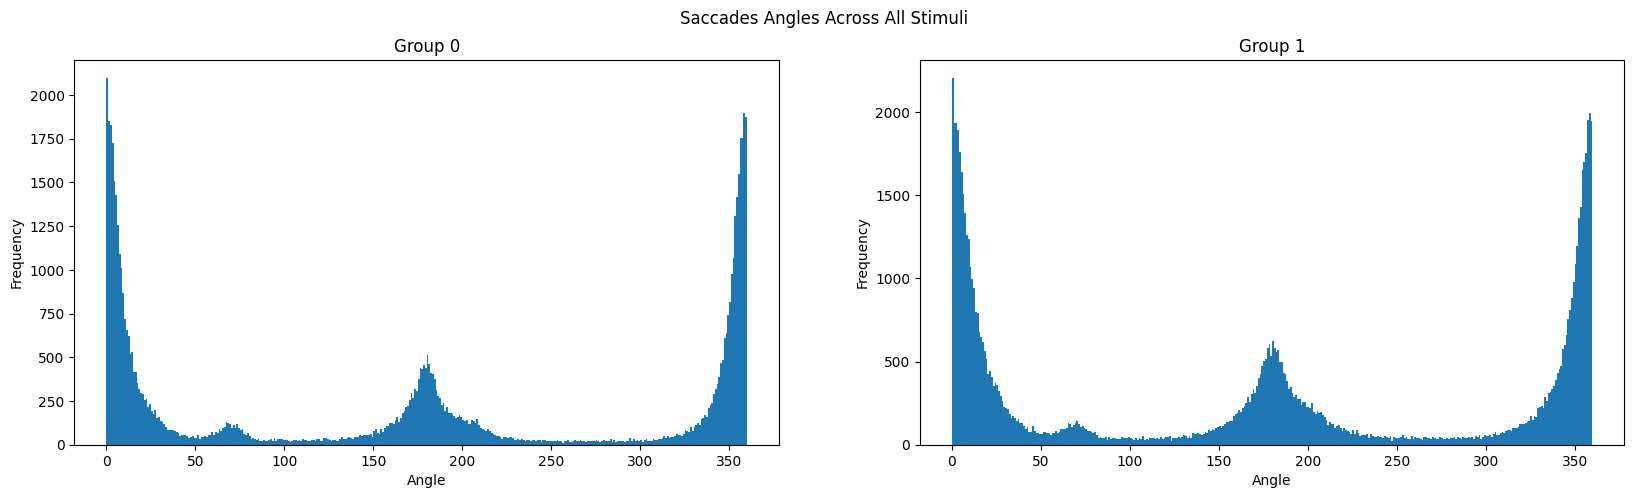

In [52]:
from scipy.stats import ttest_ind
# Initialize variables to store aggregated data
aggregated_angles = {group: [] for group in np.unique(WhichC_Munich)}

# Iterate over all stimuli
for stim in range(DyslexiaDat.np):
    groups = np.unique(WhichC_Munich)
    group_saccades = []
    
    # Collect saccades for each group
    for group in groups:
        group_saccades.append(Saccades[WhichC_Munich == group, stim, :, :])
    
    # Aggregate angles for each group
    for j, group in enumerate(group_saccades):
        for subj in group:
            for h in range(subj.shape[0]):
                for v in range(subj.shape[1]):
                    for val in subj[h, v]:
                        aggregated_angles[groups[j]].append(val)

# Plot the aggregated results
fig, ax = plt.subplots(1, len(aggregated_angles), figsize=(20, 5))
fig.suptitle('Saccades Angles Across All Stimuli')

for i, (group, angles) in enumerate(aggregated_angles.items()):
    ax[i].hist(angles, bins=360)
    ax[i].set_title(f'Group {group}')
    ax[i].set_xlabel('Angle')
    ax[i].set_ylabel('Frequency')
    print(f'Group {group}')
    print(f'Angle Entropy: {angles_entropy(angles, 360)}')
    print(f'---------------------------------------------------------')

# Perform t-test between groups
group_keys = list(aggregated_angles.keys())
t, p = ttest_ind(aggregated_angles[group_keys[0]], aggregated_angles[group_keys[1]])
print(' ')
print(f't-test between groups {group_keys[0]} and {group_keys[1]}')
print(f't: {t}, p: {p}')
print(' ')

plt.show()


In [14]:
# create a list of subjects from 117 to 200
GrazSubs = DyslexiaDat.subjects[117:200]
GrazSubs_Idx = list(range(117,200))
MunichSubs_Idx = list(range(0,117))

In [42]:
# SimVals[subjects][group]
def calculate_accuracy(SimVals, WhichCN, Idx):
    correct_labels = 0

    for i, subj in enumerate(Idx):
        # Calculate the mean for each group for the current subject
        predicted_group = 0
        min_mean = np.inf
        for j in range(np.unique(WhichCN).size):
            if len(SimVals[i][j]) > 0:
                mean = np.mean(SimVals[i][j])
            else:
                continue
            if mean <= min_mean:
                min_mean = mean
                predicted_group = j
        
        # Check if the predicted group matches the true group
        if predicted_group == WhichCN[subj]:
            correct_labels += 1
    
    # Calculate accuracy
    accuracy = correct_labels / len(Idx)
    print(f'Accuracy: {accuracy * 100:.2f}%')

In [43]:
stimn = 28

In [44]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=0, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=False, nosubj=GrazSubs_Idx)

In [45]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 50.43%


In [47]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=20, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=False, nosubj=GrazSubs_Idx)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:657: RuntimeWarning: Mean of empty slice
  SimVals[s1_idx][group].append(np.nanmean(tot_val))


In [48]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 51.28%


---

In [49]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=1, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=True, nosubj=GrazSubs_Idx)

In [50]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 70.09%


In [51]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=20, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=True, nosubj=GrazSubs_Idx)

In [52]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 57.26%


---

## MLP

We define a multilayer perceptron (MLP) to train over specific features extracted from the data.

We start from the Similarity features of a single stimulus

In [15]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [16]:
list(set_subj)

[128,
 130,
 133,
 134,
 136,
 137,
 138,
 139,
 141,
 142,
 145,
 146,
 147,
 149,
 150,
 152,
 153,
 154,
 155,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 169,
 171,
 173,
 176,
 177,
 178,
 179,
 181,
 182,
 184,
 185,
 186,
 188,
 191,
 195,
 196,
 197,
 198,
 199,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127]

In [17]:
from scipy.stats import entropy
def get_entropy(self, subj, stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = self.x_size
    sizeY = self.y_size
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent

In [18]:
def GlobalFeature(self, Saccades, stim):
    Features = np.empty((self.ns), dtype=object)
    for s in range(self.ns):
        angles = []
        progressive_s = 0
        regressive_s = 0
        for saccade in Saccades[s][stim]:
            angles.append(saccade.Angle())
            if saccade.Angle() > 270 or saccade.Angle() < 90:
                progressive_s += 1
            elif saccade.Angle() > 90 and saccade.Angle() < 270:
                regressive_s += 1
        
        fix_durations = DyslexiaDat.GetDurations(DyslexiaDat.subjects[s], DyslexiaDat.stimuli[stim])

        Features[s] = {'number_fixation':  self.nfixations[s][stim],
                       'fixation_entropy': get_entropy(self, s, stim),
                       'mean_fixation_duration': np.mean(fix_durations),
                       'std_fixation_duration': np.std(fix_durations),
                       'total_reading_duration': np.sum(fix_durations),
                       'mean_saccade_amplitude': np.mean(angles),
                       'std_saccade_amplitude': np.std(angles),
                       'regression': regressive_s,
                       'progression/regression': progressive_s if regressive_s == 0 else progressive_s/regressive_s
                        }
    return Features

In [19]:
stimuli = list(range(0, 30))

In [20]:
GlobalFeature_array = []
Saccades = DyslexiaDat.GetSaccades()
for stim in stimuli:
    GlobalFeature_array.append(GlobalFeature(DyslexiaDat, Saccades, stim))
    print(f'Global features for stimulus {stim+1} calculated')

C:\Users\nickp\AppData\Local\Temp\ipykernel_22920\641606591.py:13: RuntimeWarning: invalid value encountered in divide
  H = H / H.sum()
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide


Global features for stimulus 1 calculated
Global features for stimulus 2 calculated
Global features for stimulus 3 calculated
Global features for stimulus 4 calculated
Global features for stimulus 5 calculated
Global features for stimulus 6 calculated
Global features for stimulus 7 calculated
Global features for stimulus 8 calculated
Global features for stimulus 9 calculated
Global features for stimulus 10 calculated
Global features for stimulus 11 calculated
Global features for stimulus 12 calculated
Global features for stimulus 13 calculated
Global features for stimulus 14 calculated
Global features for stimulus 15 calculated
Global features for stimulus 16 calculated
Global features for stimulus 17 calculated
Global features for stimulus 18 calculated
Global features for stimulus 19 calculated
Global features for stimulus 20 calculated
Global features for stimulus 21 calculated
Global features for stimulus 22 calculated
Global features for stimulus 23 calculated
Global features for 

In [21]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccade = DyslexiaDat.SaccadeSel(SaccadeObj, nHor=1, nVer=1)

In [22]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='peak180', match=False, Thr=0)

In [23]:
from PyEyeSim.scanpathsimhelper import CreatAoiRects

AOIRects = CreatAoiRects(1, 1, DyslexiaDat.x_size, DyslexiaDat.y_size, allsame=DyslexiaDat.np)

In [24]:
Features = np.empty((DyslexiaDat.ns, len(stimuli),  1, 1), dtype=object)
for stim in stimuli:
    Features[:,stim,:,:] = DyslexiaDat.FeatureExtraction(SaccadeObj, Saccade[:,stim,:,:], nHor=1, stim=stim, nVer=1, AOIRects=AOIRects)
    print(f'Features for stimulus {stim+1} calculated')

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:727: RuntimeWarning: Mean of empty slice
  'mean_fixation_duration': np.nanmean(duration),


Features for stimulus 1 calculated
Features for stimulus 2 calculated
Features for stimulus 3 calculated
Features for stimulus 4 calculated
Features for stimulus 5 calculated
Features for stimulus 6 calculated
Features for stimulus 7 calculated
Features for stimulus 8 calculated
Features for stimulus 9 calculated
Features for stimulus 10 calculated
Features for stimulus 11 calculated
Features for stimulus 12 calculated
Features for stimulus 13 calculated
Features for stimulus 14 calculated
Features for stimulus 15 calculated
Features for stimulus 16 calculated
Features for stimulus 17 calculated
Features for stimulus 18 calculated
Features for stimulus 19 calculated
Features for stimulus 20 calculated
Features for stimulus 21 calculated
Features for stimulus 22 calculated
Features for stimulus 23 calculated
Features for stimulus 24 calculated
Features for stimulus 25 calculated
Features for stimulus 26 calculated
Features for stimulus 27 calculated
Features for stimulus 28 calculated
F

In [25]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
#  Calculate training and test data for different folds
train_subjects = []
test_subjects = []
training_Vals = []
labels_train = []
test_Vals = []
labels_test = []

subj = list(set(GrazSubs_Idx))

labels = np.array([WhichCN[sub] for sub in subj])

for i in range(5):
    train_subj, test_subj = train_test_split(
        subj, 
        test_size=0.1, 
        random_state=i,
        stratify=labels
    )

    train_subjects.append(train_subj)
    test_subjects.append(test_subj)

    remove_subj = np.append(test_subj, np.array(MunichSubs_Idx))

    # Train set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=True, nosubj=list(remove_subj), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:])
        temp.append(SimAndFeatureVals)
    
    training_Vals.append(temp)
    labels_train.append(np.array([WhichCN[sub] for sub in train_subj]))


    # Test set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=True, SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:]) 
        temp.append(SimAndFeatureVals)
    
    test_Vals.append(temp)
    labels_test.append(np.array([WhichCN[sub] for sub in test_subj]))

In [26]:
print(len(training_Vals)) # 5 folds
print(len(training_Vals[0])) # 30 stimuli
print(len(training_Vals[0][0])) # 74 train subjects so 74 values for each group
print(len(test_Vals[0][0])) # 9 test subjects

5
30
74
9


In [27]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 7))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [28]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()

In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients

def explain_prediction(model, input_tensor, target_class=None):
    model.eval()
    
    # Ensure input has batch dimension
    if len(input_tensor.shape) == 1:
        input_tensor = input_tensor.unsqueeze(0)
    
    # Ensure input requires grad
    input_tensor = input_tensor.requires_grad_(True)
    
    ig = IntegratedGradients(model)
    
    # If target_class is None, use the predicted class
    if target_class is None:
        with torch.no_grad():
            pred = model(input_tensor)
            target_class = pred.argmax(dim=1)
    else:
        # Ensure target_class is proper tensor format
        if isinstance(target_class, (int, np.integer)):
            target_class = torch.tensor([target_class])
        elif isinstance(target_class, np.ndarray):
            target_class = torch.from_numpy(target_class)
    
    # Get attributions
    attributions, approximation_error = ig.attribute(
        input_tensor, 
        target=target_class, 
        return_convergence_delta=True
    )
    return attributions, approximation_error

def visualize_attribution_boxplot(attribution_matrix, feature_names):
    """
    Create a box plot showing the distribution of attributions across stimuli
    
    Args:
        attribution_matrix: Shape (n_features, n_stimuli) - attributions for each feature across stimuli
        feature_names: List of feature names
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True, 
                    showmeans=True, meanline=True)
    
    # Color boxes based on mean attribution (red for negative, blue for positive)
    means = [np.mean(data) for data in box_data]
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    # Customize the plot
    ax.set_ylabel("Attribution Score")
    ax.set_title("Feature Attribution Distribution Across Stimuli\n(Box=IQR, Whiskers=1.5×IQR, Orange=Mean, Green-Dotted=Median, White-Circle=Outliers)")
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add zero line
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nFeature Attribution Summary:")
    print("-" * 60)
    for i, name in enumerate(feature_names):
        data = attribution_matrix[i, :]
        print(f"{name:30s}: Mean={np.mean(data):7.4f}, Std={np.std(data):7.4f}, "
              f"Min={np.min(data):7.4f}, Max={np.max(data):7.4f}")

def visualize_attribution_comparison(attribution_matrix, feature_names):
    """
    Create both bar plot (means) and box plot side by side
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Left plot: Traditional bar plot with error bars
    means = np.mean(attribution_matrix, axis=1)
    stds = np.std(attribution_matrix, axis=1)
    colors = ['red' if x < 0 else 'blue' for x in means]
    
    ax1.barh(feature_names, means, xerr=stds, color=colors, alpha=0.7, capsize=5)
    ax1.set_xlabel("Attribution Score")
    ax1.set_title("Mean Attribution ± Std Dev")
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Right plot: Box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax2.boxplot(box_data, labels=range(len(feature_names)), patch_artist=True,
                     showmeans=True, meanline=True, vert=False)
    
    # Color boxes
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    ax2.set_yticks(range(1, len(feature_names) + 1))
    ax2.set_yticklabels(feature_names)
    ax2.set_xlabel("Attribution Score")
    ax2.set_title("Attribution Distribution (Box Plot)")
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
def train_test_pipeline(stimuli, momentum = 0.8):
    torch.manual_seed(42)
    np.random.seed(42)
    results = []
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for i in range(5):
        best_loss = np.inf

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(training_Vals[i][idx], subj=train_subjects[i], stim=idx, vec=vector_roi)

        #check if there are any NaN values in vector_roi
        if np.isnan(vector_roi).any():
            # replace NaN values with 0
            vector_roi = np.nan_to_num(vector_roi)
            
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train[i], dtype=torch.long).to(device) 

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(test_Vals[i][idx], subj=test_subjects[i], stim=idx, vec=vector_roi)
        
        #check if there are any NaN values in vector_roi
        if np.isnan(vector_roi).any():
            # replace NaN values with 0
            vector_roi = np.nan_to_num(vector_roi)
        
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)
        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test[i], dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())
        # Save data
        results.append({
            'model': model,
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'predictions': predictions.cpu().numpy(),
            'accuracy': accuracy[-1],
            'conf_matrix': conf_matrix
        })

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

    return results

#### Original Feature

In [37]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 7))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [38]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(210, 110)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(110, 55)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(55, 27) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(27, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.6825000047683716
Epoch 5 loss: 0.4417200982570648
Epoch 10 loss: 0.35098183155059814
Epoch 15 loss: 0.3318507671356201
Epoch 0 loss: 0.6572619676589966
Epoch 5 loss: 0.41265997290611267
Epoch 10 loss: 0.3531438410282135
Epoch 15 loss: 0.33776262402534485
Epoch 0 loss: 0.6889740228652954
Epoch 5 loss: 0.39204728603363037
Epoch 10 loss: 0.3314552903175354
Epoch 15 loss: 0.3396889269351959
Epoch 0 loss: 0.8933721780776978
Epoch 5 loss: 0.4479502737522125
Epoch 10 loss: 0.3404725193977356
Epoch 15 loss: 0.3398721218109131
Epoch 0 loss: 0.7331852316856384
Epoch 5 loss: 0.3978247344493866
Epoch 10 loss: 0.36165887117385864
Epoch 15 loss: 0.35815635323524475
Average accuracy: 0.9111111111111111
Standard deviation: 0.08314794192830981
Total confusion matrix:
[[31.  4.]
 [ 0. 10.]]
False positives: 4.0
False negatives: 0.0


In [39]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.6825000047683716
Epoch 5 loss: 0.47458282113075256
Epoch 10 loss: 0.3757718503475189
Epoch 15 loss: 0.3571987450122833
Epoch 0 loss: 0.6572619676589966
Epoch 5 loss: 0.447610080242157
Epoch 10 loss: 0.37668633460998535
Epoch 15 loss: 0.3600721061229706
Epoch 0 loss: 0.6889740228652954
Epoch 5 loss: 0.42328929901123047
Epoch 10 loss: 0.3605285584926605
Epoch 15 loss: 0.36067435145378113
Epoch 0 loss: 0.8933721780776978
Epoch 5 loss: 0.45623764395713806
Epoch 10 loss: 0.35776299238204956
Epoch 15 loss: 0.3565991520881653
Epoch 0 loss: 0.7331852316856384
Epoch 5 loss: 0.41809532046318054
Epoch 10 loss: 0.38800475001335144
Epoch 15 loss: 0.38835546374320984
Average accuracy: 0.9555555555555555
Standard deviation: 0.054433105395181765
Total confusion matrix:
[[33.  2.]
 [ 0. 10.]]
False positives: 2.0
False negatives: 0.0


Approximation Error: 0.00038844908704049885 (< 0.05 is good)

FEATURE ANALYSIS


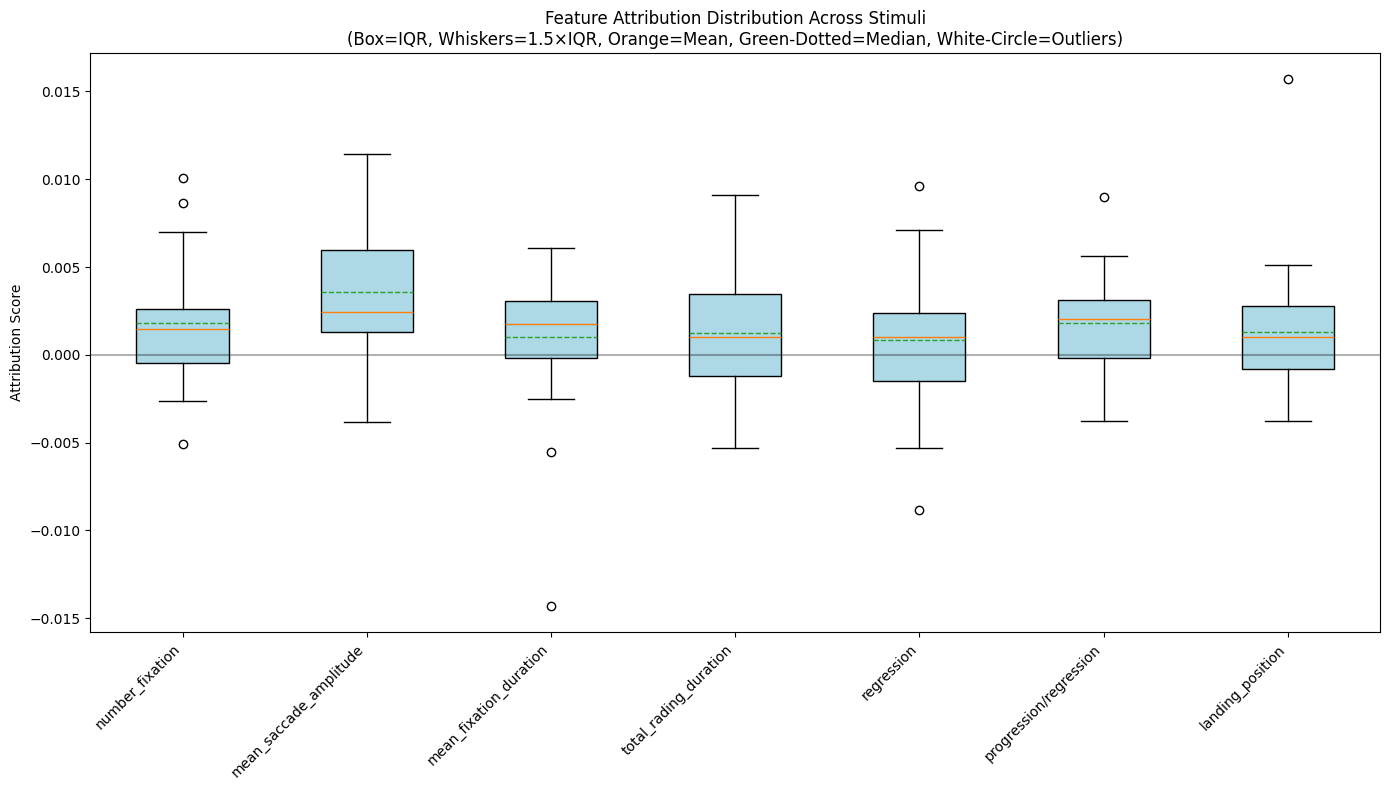


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0018, Std= 0.0033, Min=-0.0051, Max= 0.0101
mean_saccade_amplitude        : Mean= 0.0036, Std= 0.0039, Min=-0.0038, Max= 0.0115
mean_fixation_duration        : Mean= 0.0010, Std= 0.0038, Min=-0.0143, Max= 0.0061
total_rading_duration         : Mean= 0.0013, Std= 0.0031, Min=-0.0053, Max= 0.0091
regression                    : Mean= 0.0008, Std= 0.0039, Min=-0.0089, Max= 0.0096
progression/regression        : Mean= 0.0018, Std= 0.0027, Min=-0.0037, Max= 0.0090
landing_position              : Mean= 0.0013, Std= 0.0035, Min=-0.0038, Max= 0.0157


In [40]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_rading_duration",
    "regression",
    "progression/regression",
    "landing_position",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original + Additional Features

In [51]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_saccade_amplitude']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [52]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 33) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(33, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.8087480664253235
Epoch 5 loss: 0.42224225401878357
Epoch 10 loss: 0.3611488342285156
Epoch 15 loss: 0.34154418110847473
Epoch 0 loss: 0.8607933521270752
Epoch 5 loss: 0.44085898995399475
Epoch 10 loss: 0.34998375177383423
Epoch 15 loss: 0.3349204659461975
Epoch 0 loss: 0.7441170811653137
Epoch 5 loss: 0.4111017882823944
Epoch 10 loss: 0.3385796546936035
Epoch 15 loss: 0.3304196298122406
Epoch 0 loss: 0.5914326310157776
Epoch 5 loss: 0.3942810595035553
Epoch 10 loss: 0.33925920724868774
Epoch 15 loss: 0.3315603733062744
Epoch 0 loss: 0.7140848636627197
Epoch 5 loss: 0.3525574505329132
Epoch 10 loss: 0.3348523676395416
Epoch 15 loss: 0.32620149850845337
Average accuracy: 0.888888888888889
Standard deviation: 0.09938079899999065
Total confusion matrix:
[[30.  5.]
 [ 0. 10.]]
False positives: 5.0
False negatives: 0.0


In [53]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.8087480664253235
Epoch 5 loss: 0.44225069880485535
Epoch 10 loss: 0.3849475085735321
Epoch 15 loss: 0.34815168380737305
Epoch 0 loss: 0.8607933521270752
Epoch 5 loss: 0.4482882618904114
Epoch 10 loss: 0.3784792125225067
Epoch 15 loss: 0.35771191120147705
Epoch 0 loss: 0.7441170811653137
Epoch 5 loss: 0.4418305456638336
Epoch 10 loss: 0.35480567812919617
Epoch 15 loss: 0.34871360659599304
Epoch 0 loss: 0.5914326310157776
Epoch 5 loss: 0.40798768401145935
Epoch 10 loss: 0.3539232611656189
Epoch 15 loss: 0.3331092894077301
Epoch 0 loss: 0.7140848636627197
Epoch 5 loss: 0.36553773283958435
Epoch 10 loss: 0.35054463148117065
Epoch 15 loss: 0.33948299288749695
Average accuracy: 0.9111111111111111
Standard deviation: 0.08314794192830981
Total confusion matrix:
[[31.  4.]
 [ 0. 10.]]
False positives: 4.0
False negatives: 0.0


Approximation Error: -0.00023513635096605867 (< 0.05 is good)

FEATURE ANALYSIS


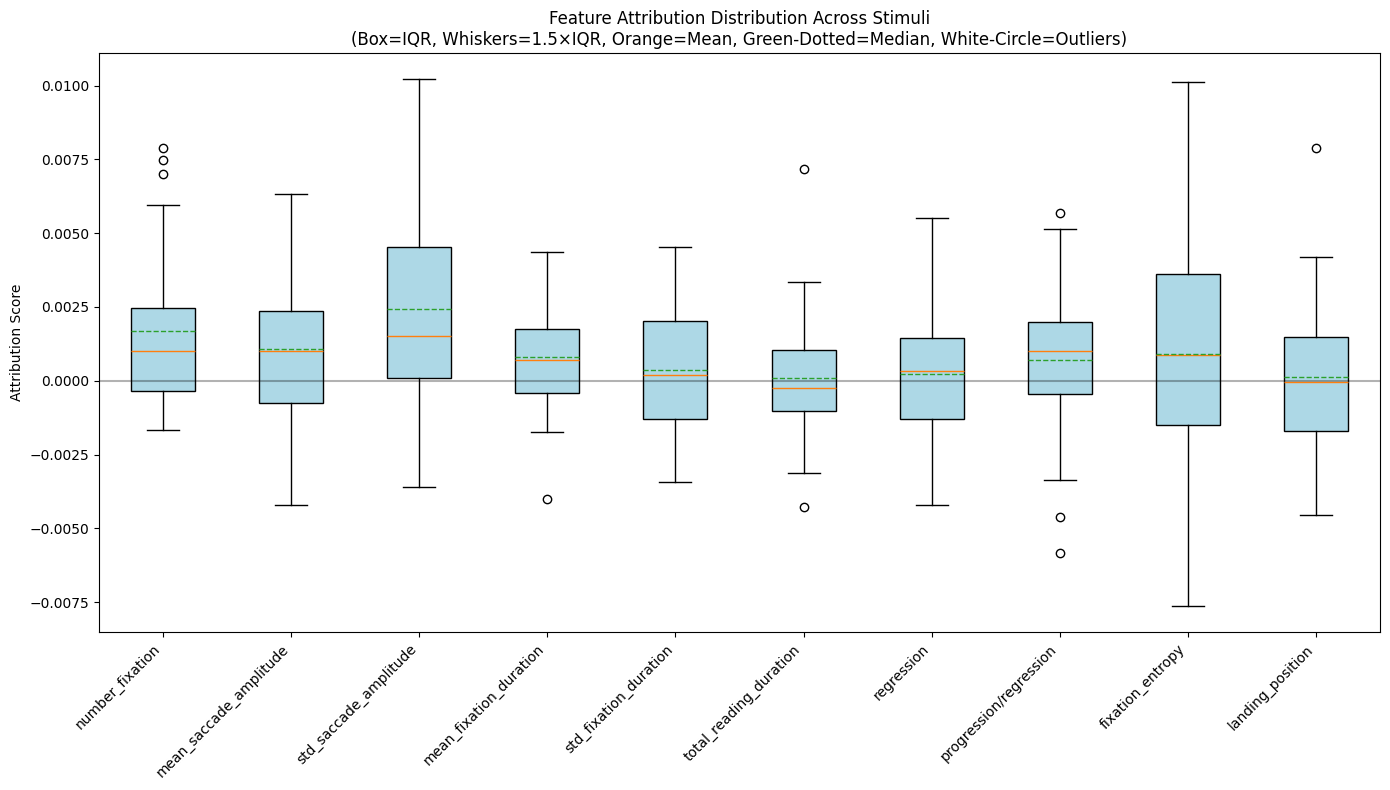


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0017, Std= 0.0026, Min=-0.0017, Max= 0.0079
mean_saccade_amplitude        : Mean= 0.0011, Std= 0.0026, Min=-0.0042, Max= 0.0063
std_saccade_amplitude         : Mean= 0.0024, Std= 0.0034, Min=-0.0036, Max= 0.0102
mean_fixation_duration        : Mean= 0.0008, Std= 0.0018, Min=-0.0040, Max= 0.0044
std_fixation_duration         : Mean= 0.0004, Std= 0.0020, Min=-0.0034, Max= 0.0045
total_reading_duration        : Mean= 0.0001, Std= 0.0022, Min=-0.0043, Max= 0.0072
regression                    : Mean= 0.0002, Std= 0.0023, Min=-0.0042, Max= 0.0055
progression/regression        : Mean= 0.0007, Std= 0.0028, Min=-0.0058, Max= 0.0057
fixation_entropy              : Mean= 0.0009, Std= 0.0036, Min=-0.0076, Max= 0.0101
landing_position              : Mean= 0.0001, Std= 0.0026, Min=-0.0045, Max= 0.0079


In [54]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original (without mean saccade amplitude)

In [55]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 6))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [56]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(180, 90)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(90, 45)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(45, 23) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(23, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.8035051226615906
Epoch 5 loss: 0.47987088561058044
Epoch 10 loss: 0.39111843705177307
Epoch 15 loss: 0.335567831993103
Epoch 0 loss: 0.73125821352005
Epoch 5 loss: 0.45436468720436096
Epoch 10 loss: 0.38394734263420105
Epoch 15 loss: 0.33762213587760925
Epoch 0 loss: 0.7775467038154602
Epoch 5 loss: 0.4293915629386902
Epoch 10 loss: 0.35118240118026733
Epoch 15 loss: 0.34359580278396606
Epoch 0 loss: 0.6955331563949585
Epoch 5 loss: 0.4419049024581909
Epoch 10 loss: 0.37868160009384155
Epoch 15 loss: 0.3543863296508789
Epoch 0 loss: 0.8113250136375427
Epoch 5 loss: 0.46126824617385864
Epoch 10 loss: 0.36374273896217346
Epoch 15 loss: 0.3643479347229004
Average accuracy: 0.8666666666666666
Standard deviation: 0.0831479419283098
Total confusion matrix:
[[29.  6.]
 [ 0. 10.]]
False positives: 6.0
False negatives: 0.0


In [57]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.8035051226615906
Epoch 5 loss: 0.4995252192020416
Epoch 10 loss: 0.43754902482032776
Epoch 15 loss: 0.36645281314849854
Epoch 0 loss: 0.73125821352005
Epoch 5 loss: 0.48494571447372437
Epoch 10 loss: 0.42024338245391846
Epoch 15 loss: 0.37175121903419495
Epoch 0 loss: 0.7775467038154602
Epoch 5 loss: 0.4480408728122711
Epoch 10 loss: 0.38101816177368164
Epoch 15 loss: 0.3630892336368561
Epoch 0 loss: 0.6955331563949585
Epoch 5 loss: 0.45829999446868896
Epoch 10 loss: 0.4057709276676178
Epoch 15 loss: 0.3888714909553528
Epoch 0 loss: 0.8113250136375427
Epoch 5 loss: 0.48398542404174805
Epoch 10 loss: 0.39513352513313293
Epoch 15 loss: 0.3867163360118866
Average accuracy: 0.8666666666666666
Standard deviation: 0.0831479419283098
Total confusion matrix:
[[30.  5.]
 [ 1.  9.]]
False positives: 5.0
False negatives: 1.0


In [61]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 7))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_saccade_amplitude']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [62]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(210, 110)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(110, 55)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(55, 27) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(27, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7005716562271118
Epoch 5 loss: 0.47587594389915466
Epoch 10 loss: 0.3582350015640259
Epoch 15 loss: 0.3376199007034302
Epoch 0 loss: 0.6686617732048035
Epoch 5 loss: 0.45964786410331726
Epoch 10 loss: 0.37515002489089966
Epoch 15 loss: 0.3466470241546631
Epoch 0 loss: 0.7076587080955505
Epoch 5 loss: 0.41554686427116394
Epoch 10 loss: 0.3534070551395416
Epoch 15 loss: 0.3391546308994293
Epoch 0 loss: 0.8948358297348022
Epoch 5 loss: 0.48102259635925293
Epoch 10 loss: 0.35056036710739136
Epoch 15 loss: 0.36064088344573975
Epoch 0 loss: 0.7413161396980286
Epoch 5 loss: 0.449100136756897
Epoch 10 loss: 0.3811068832874298
Epoch 15 loss: 0.36001694202423096
Average accuracy: 0.8444444444444443
Standard deviation: 0.11331154474650633
Total confusion matrix:
[[28.  7.]
 [ 0. 10.]]
False positives: 7.0
False negatives: 0.0


In [63]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7005716562271118
Epoch 5 loss: 0.5074999928474426
Epoch 10 loss: 0.39339613914489746
Epoch 15 loss: 0.354023814201355
Epoch 0 loss: 0.6686617732048035
Epoch 5 loss: 0.4884618818759918
Epoch 10 loss: 0.40539559721946716
Epoch 15 loss: 0.37148329615592957
Epoch 0 loss: 0.7076587080955505
Epoch 5 loss: 0.4486302435398102
Epoch 10 loss: 0.3760976791381836
Epoch 15 loss: 0.3579840660095215
Epoch 0 loss: 0.8948358297348022
Epoch 5 loss: 0.4779506325721741
Epoch 10 loss: 0.3666437864303589
Epoch 15 loss: 0.3598461449146271
Epoch 0 loss: 0.7413161396980286
Epoch 5 loss: 0.46450644731521606
Epoch 10 loss: 0.4063158929347992
Epoch 15 loss: 0.40057089924812317
Average accuracy: 0.8666666666666666
Standard deviation: 0.12957670877434002
Total confusion matrix:
[[29.  6.]
 [ 0. 10.]]
False positives: 6.0
False negatives: 0.0


#### Original and Similarity (Avg and Std)

In [ ]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [66]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(330, 165)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(165, 83)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(83, 42) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(42, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7551268935203552
Epoch 5 loss: 0.35701724886894226
Epoch 10 loss: 0.3409768044948578
Epoch 15 loss: 0.3291158676147461
Epoch 0 loss: 0.7211706042289734
Epoch 5 loss: 0.3972204029560089
Epoch 10 loss: 0.35057276487350464
Epoch 15 loss: 0.34088945388793945
Epoch 0 loss: 0.7265825271606445
Epoch 5 loss: 0.3818439841270447
Epoch 10 loss: 0.34091776609420776
Epoch 15 loss: 0.32715779542922974
Epoch 0 loss: 0.6853696703910828
Epoch 5 loss: 0.41736018657684326
Epoch 10 loss: 0.3583703637123108
Epoch 15 loss: 0.34253913164138794
Epoch 0 loss: 0.6967496275901794
Epoch 5 loss: 0.43001729249954224
Epoch 10 loss: 0.3417707681655884
Epoch 15 loss: 0.3330306112766266
Average accuracy: 0.888888888888889
Standard deviation: 0.09938079899999065
Total confusion matrix:
[[30.  5.]
 [ 0. 10.]]
False positives: 5.0
False negatives: 0.0


In [68]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7551268935203552
Epoch 5 loss: 0.37471169233322144
Epoch 10 loss: 0.3571383059024811
Epoch 15 loss: 0.33284252882003784
Epoch 0 loss: 0.7211706042289734
Epoch 5 loss: 0.4198770821094513
Epoch 10 loss: 0.38761159777641296
Epoch 15 loss: 0.34083548188209534
Epoch 0 loss: 0.7265825271606445
Epoch 5 loss: 0.410496324300766
Epoch 10 loss: 0.362167090177536
Epoch 15 loss: 0.33488690853118896
Epoch 0 loss: 0.6853696703910828
Epoch 5 loss: 0.44173091650009155
Epoch 10 loss: 0.38331496715545654
Epoch 15 loss: 0.359876811504364
Epoch 0 loss: 0.6967496275901794
Epoch 5 loss: 0.45406022667884827
Epoch 10 loss: 0.3581390082836151
Epoch 15 loss: 0.3463990092277527
Average accuracy: 0.9111111111111111
Standard deviation: 0.08314794192830981
Total confusion matrix:
[[32.  3.]
 [ 1.  9.]]
False positives: 3.0
False negatives: 1.0


Approximation Error: -0.00027252486324869096 (< 0.05 is good)

FEATURE ANALYSIS


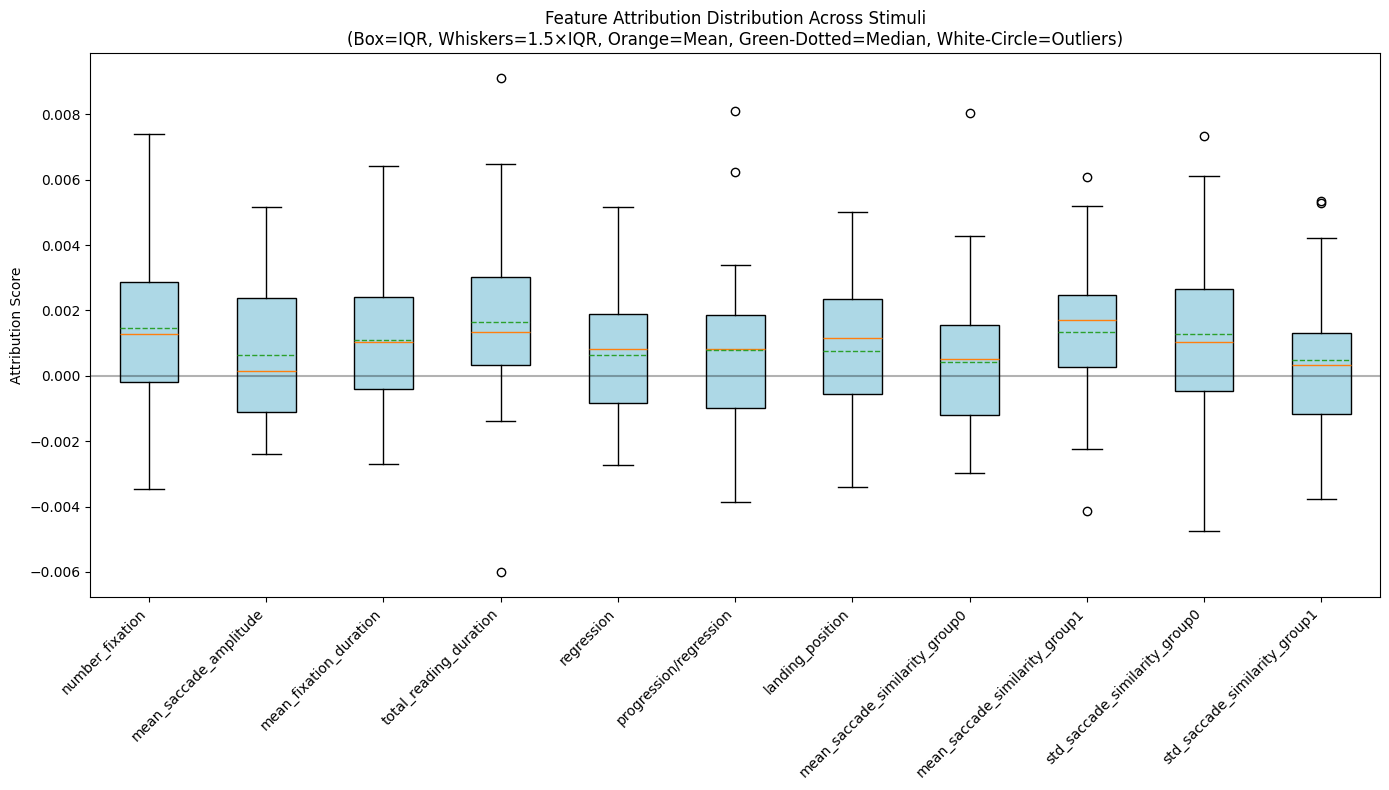


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0015, Std= 0.0022, Min=-0.0035, Max= 0.0074
mean_saccade_amplitude        : Mean= 0.0006, Std= 0.0021, Min=-0.0024, Max= 0.0052
mean_fixation_duration        : Mean= 0.0011, Std= 0.0024, Min=-0.0027, Max= 0.0064
total_reading_duration        : Mean= 0.0017, Std= 0.0026, Min=-0.0060, Max= 0.0091
regression                    : Mean= 0.0006, Std= 0.0020, Min=-0.0027, Max= 0.0052
progression/regression        : Mean= 0.0008, Std= 0.0024, Min=-0.0039, Max= 0.0081
landing_position              : Mean= 0.0008, Std= 0.0021, Min=-0.0034, Max= 0.0050
mean_saccade_similarity_group0: Mean= 0.0004, Std= 0.0022, Min=-0.0030, Max= 0.0080
mean_saccade_similarity_group1: Mean= 0.0013, Std= 0.0022, Min=-0.0041, Max= 0.0061
std_saccade_similarity_group0 : Mean= 0.0013, Std= 0.0024, Min=-0.0047, Max= 0.0073
std_saccade_similarity_group1 : Mean= 0.0005, Std= 0.0022, Min=-0.003

In [69]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Avg similarity

In [87]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 9))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [88]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(270, 130)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(130, 65)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(65, 33) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(33, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.8004629015922546
Epoch 5 loss: 0.48852306604385376
Epoch 10 loss: 0.36885538697242737
Epoch 15 loss: 0.33216050267219543
Epoch 0 loss: 0.6813597083091736
Epoch 5 loss: 0.43598443269729614
Epoch 10 loss: 0.3575831949710846
Epoch 15 loss: 0.3304058909416199
Epoch 0 loss: 0.6511480808258057
Epoch 5 loss: 0.40946975350379944
Epoch 10 loss: 0.35262584686279297
Epoch 15 loss: 0.3303288519382477
Epoch 0 loss: 0.7737398743629456
Epoch 5 loss: 0.4450834095478058
Epoch 10 loss: 0.3514854907989502
Epoch 15 loss: 0.33275169134140015
Epoch 0 loss: 0.8401308059692383
Epoch 5 loss: 0.43505173921585083
Epoch 10 loss: 0.34809184074401855
Epoch 15 loss: 0.33019110560417175
Average accuracy: 0.9333333333333332
Standard deviation: 0.054433105395181765
Total confusion matrix:
[[32.  3.]
 [ 0. 10.]]
False positives: 3.0
False negatives: 0.0


In [89]:
results = train_test_pipeline(stimuli, 0.5)    

Using device: cuda
Epoch 0 loss: 0.8004629015922546
Epoch 5 loss: 0.4961301386356354
Epoch 10 loss: 0.38727203011512756
Epoch 15 loss: 0.3531590402126312
Epoch 0 loss: 0.6813597083091736
Epoch 5 loss: 0.4525047540664673
Epoch 10 loss: 0.37440890073776245
Epoch 15 loss: 0.35276252031326294
Epoch 0 loss: 0.6511480808258057
Epoch 5 loss: 0.4432096779346466
Epoch 10 loss: 0.3887465298175812
Epoch 15 loss: 0.3455450236797333
Epoch 0 loss: 0.7737398743629456
Epoch 5 loss: 0.4710357189178467
Epoch 10 loss: 0.39019307494163513
Epoch 15 loss: 0.3557473123073578
Epoch 0 loss: 0.8401308059692383
Epoch 5 loss: 0.45390382409095764
Epoch 10 loss: 0.3713722229003906
Epoch 15 loss: 0.33909836411476135
Average accuracy: 0.9333333333333332
Standard deviation: 0.05443310539518176
Total confusion matrix:
[[33.  2.]
 [ 1.  9.]]
False positives: 2.0
False negatives: 1.0


Approximation Error: -0.00012498431897256523 (< 0.05 is good)

FEATURE ANALYSIS


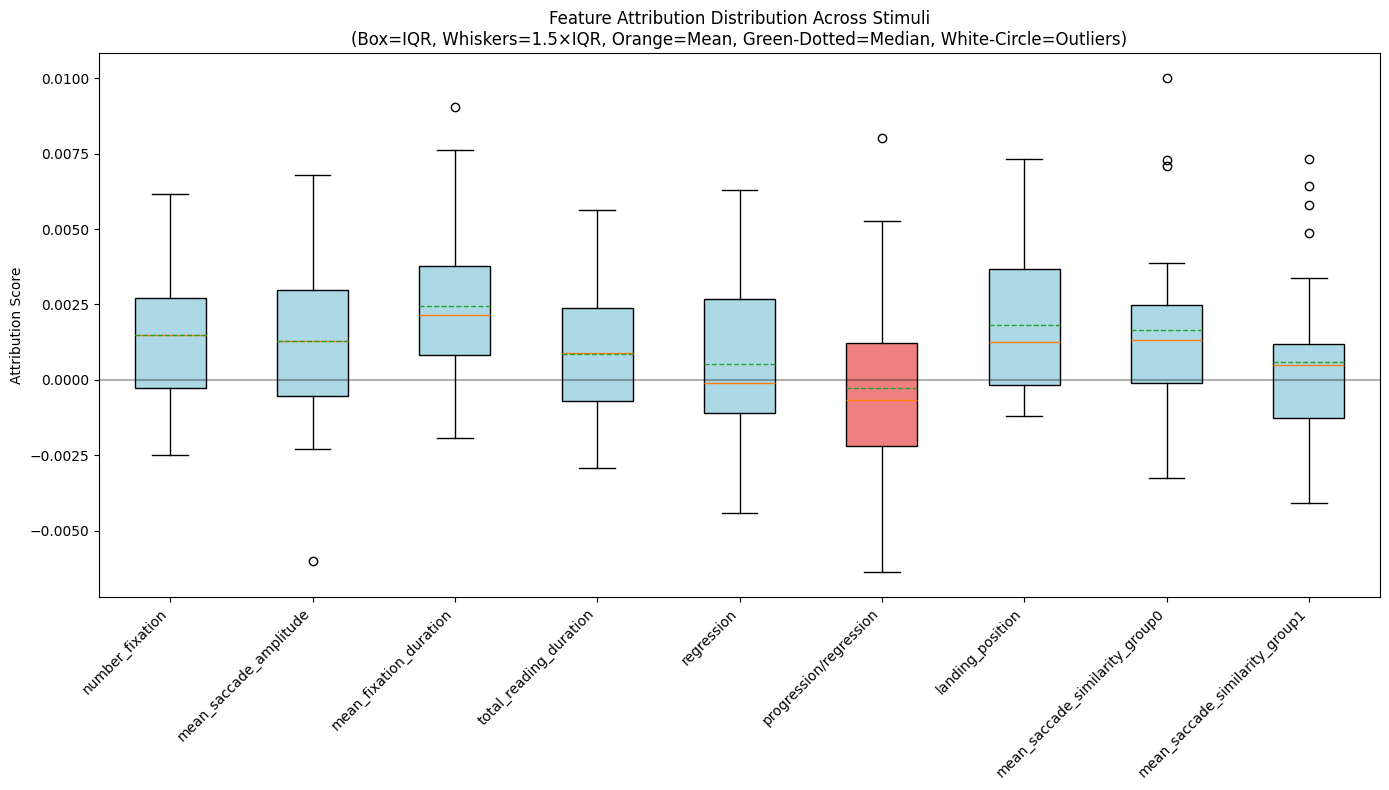


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0015, Std= 0.0023, Min=-0.0025, Max= 0.0062
mean_saccade_amplitude        : Mean= 0.0013, Std= 0.0028, Min=-0.0060, Max= 0.0068
mean_fixation_duration        : Mean= 0.0024, Std= 0.0026, Min=-0.0019, Max= 0.0090
total_reading_duration        : Mean= 0.0009, Std= 0.0020, Min=-0.0029, Max= 0.0056
regression                    : Mean= 0.0005, Std= 0.0027, Min=-0.0044, Max= 0.0063
progression/regression        : Mean=-0.0003, Std= 0.0030, Min=-0.0064, Max= 0.0080
landing_position              : Mean= 0.0018, Std= 0.0025, Min=-0.0012, Max= 0.0073
mean_saccade_similarity_group0: Mean= 0.0017, Std= 0.0028, Min=-0.0033, Max= 0.0100
mean_saccade_similarity_group1: Mean= 0.0006, Std= 0.0028, Min=-0.0041, Max= 0.0073


In [90]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Avg similarity (without mean saccade amplitude)

In [71]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [72]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 32) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(32, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7631221413612366
Epoch 5 loss: 0.4157509207725525
Epoch 10 loss: 0.36519449949264526
Epoch 15 loss: 0.34781625866889954
Epoch 0 loss: 0.8336564898490906
Epoch 5 loss: 0.45162463188171387
Epoch 10 loss: 0.37425222992897034
Epoch 15 loss: 0.3495403528213501
Epoch 0 loss: 0.6974469423294067
Epoch 5 loss: 0.40443265438079834
Epoch 10 loss: 0.3437718152999878
Epoch 15 loss: 0.3330446779727936
Epoch 0 loss: 0.6186795830726624
Epoch 5 loss: 0.4023425281047821
Epoch 10 loss: 0.35520386695861816
Epoch 15 loss: 0.34245559573173523
Epoch 0 loss: 0.612667977809906
Epoch 5 loss: 0.4188058376312256
Epoch 10 loss: 0.35914039611816406
Epoch 15 loss: 0.3303464651107788
Average accuracy: 0.9333333333333332
Standard deviation: 0.054433105395181765
Total confusion matrix:
[[32.  3.]
 [ 0. 10.]]
False positives: 3.0
False negatives: 0.0


In [73]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7631221413612366
Epoch 5 loss: 0.4438484311103821
Epoch 10 loss: 0.39312970638275146
Epoch 15 loss: 0.3727801442146301
Epoch 0 loss: 0.8336564898490906
Epoch 5 loss: 0.4656553566455841
Epoch 10 loss: 0.39361900091171265
Epoch 15 loss: 0.3652365803718567
Epoch 0 loss: 0.6974469423294067
Epoch 5 loss: 0.43521133065223694
Epoch 10 loss: 0.3709256947040558
Epoch 15 loss: 0.335300087928772
Epoch 0 loss: 0.6186795830726624
Epoch 5 loss: 0.43850743770599365
Epoch 10 loss: 0.37743163108825684
Epoch 15 loss: 0.3543147146701813
Epoch 0 loss: 0.612667977809906
Epoch 5 loss: 0.4347694516181946
Epoch 10 loss: 0.3662477433681488
Epoch 15 loss: 0.3351280987262726
Average accuracy: 0.9777777777777779
Standard deviation: 0.04444444444444447
Total confusion matrix:
[[34.  1.]
 [ 0. 10.]]
False positives: 1.0
False negatives: 0.0


Approximation Error: -0.0003263268154114485 (< 0.05 is good)

FEATURE ANALYSIS


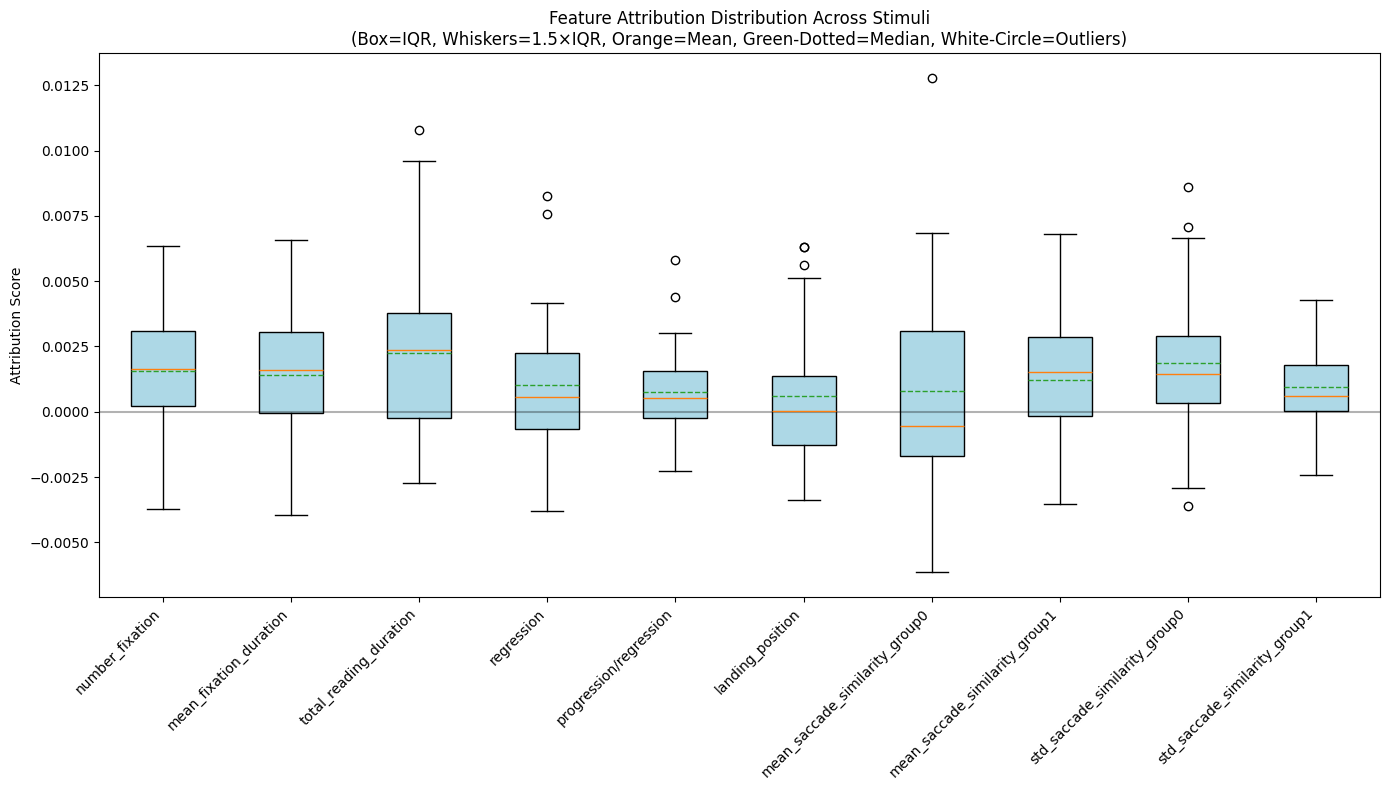


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0016, Std= 0.0023, Min=-0.0037, Max= 0.0063
mean_fixation_duration        : Mean= 0.0014, Std= 0.0024, Min=-0.0040, Max= 0.0066
total_reading_duration        : Mean= 0.0023, Std= 0.0032, Min=-0.0027, Max= 0.0108
regression                    : Mean= 0.0010, Std= 0.0025, Min=-0.0038, Max= 0.0083
progression/regression        : Mean= 0.0007, Std= 0.0018, Min=-0.0023, Max= 0.0058
landing_position              : Mean= 0.0006, Std= 0.0026, Min=-0.0034, Max= 0.0063
mean_saccade_similarity_group0: Mean= 0.0008, Std= 0.0039, Min=-0.0061, Max= 0.0128
mean_saccade_similarity_group1: Mean= 0.0012, Std= 0.0023, Min=-0.0035, Max= 0.0068
std_saccade_similarity_group0 : Mean= 0.0019, Std= 0.0028, Min=-0.0036, Max= 0.0086
std_saccade_similarity_group1 : Mean= 0.0010, Std= 0.0018, Min=-0.0024, Max= 0.0043


In [74]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration", 
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [76]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [77]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.6719564199447632
Epoch 5 loss: 0.48633652925491333
Epoch 10 loss: 0.37112799286842346
Epoch 15 loss: 0.3398128151893616
Epoch 0 loss: 0.7482184767723083
Epoch 5 loss: 0.4327636957168579
Epoch 10 loss: 0.35643643140792847
Epoch 15 loss: 0.34577277302742004
Epoch 0 loss: 0.7246888279914856
Epoch 5 loss: 0.4190978705883026
Epoch 10 loss: 0.36472633481025696
Epoch 15 loss: 0.3354555368423462
Epoch 0 loss: 0.7178786993026733
Epoch 5 loss: 0.37737393379211426
Epoch 10 loss: 0.35490086674690247
Epoch 15 loss: 0.34312716126441956
Epoch 0 loss: 0.6575343012809753
Epoch 5 loss: 0.4340853691101074
Epoch 10 loss: 0.37828928232192993
Epoch 15 loss: 0.3442285656929016
Average accuracy: 0.8666666666666666
Standard deviation: 0.04444444444444442
Total confusion matrix:
[[30.  5.]
 [ 1.  9.]]
False positives: 5.0
False negatives: 1.0


In [78]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.6719564199447632
Epoch 5 loss: 0.48782777786254883
Epoch 10 loss: 0.3904874622821808
Epoch 15 loss: 0.37414711713790894
Epoch 0 loss: 0.7482184767723083
Epoch 5 loss: 0.45941492915153503
Epoch 10 loss: 0.3682635426521301
Epoch 15 loss: 0.3517465889453888
Epoch 0 loss: 0.7246888279914856
Epoch 5 loss: 0.44794413447380066
Epoch 10 loss: 0.38514265418052673
Epoch 15 loss: 0.36775532364845276
Epoch 0 loss: 0.7178786993026733
Epoch 5 loss: 0.4016437828540802
Epoch 10 loss: 0.3868357837200165
Epoch 15 loss: 0.35393548011779785
Epoch 0 loss: 0.6575343012809753
Epoch 5 loss: 0.46689343452453613
Epoch 10 loss: 0.41207313537597656
Epoch 15 loss: 0.3717895448207855
Average accuracy: 0.9333333333333332
Standard deviation: 0.054433105395181765
Total confusion matrix:
[[33.  2.]
 [ 1.  9.]]
False positives: 2.0
False negatives: 1.0


Approximation Error: -0.0006632430595345795 (< 0.05 is good)

FEATURE ANALYSIS


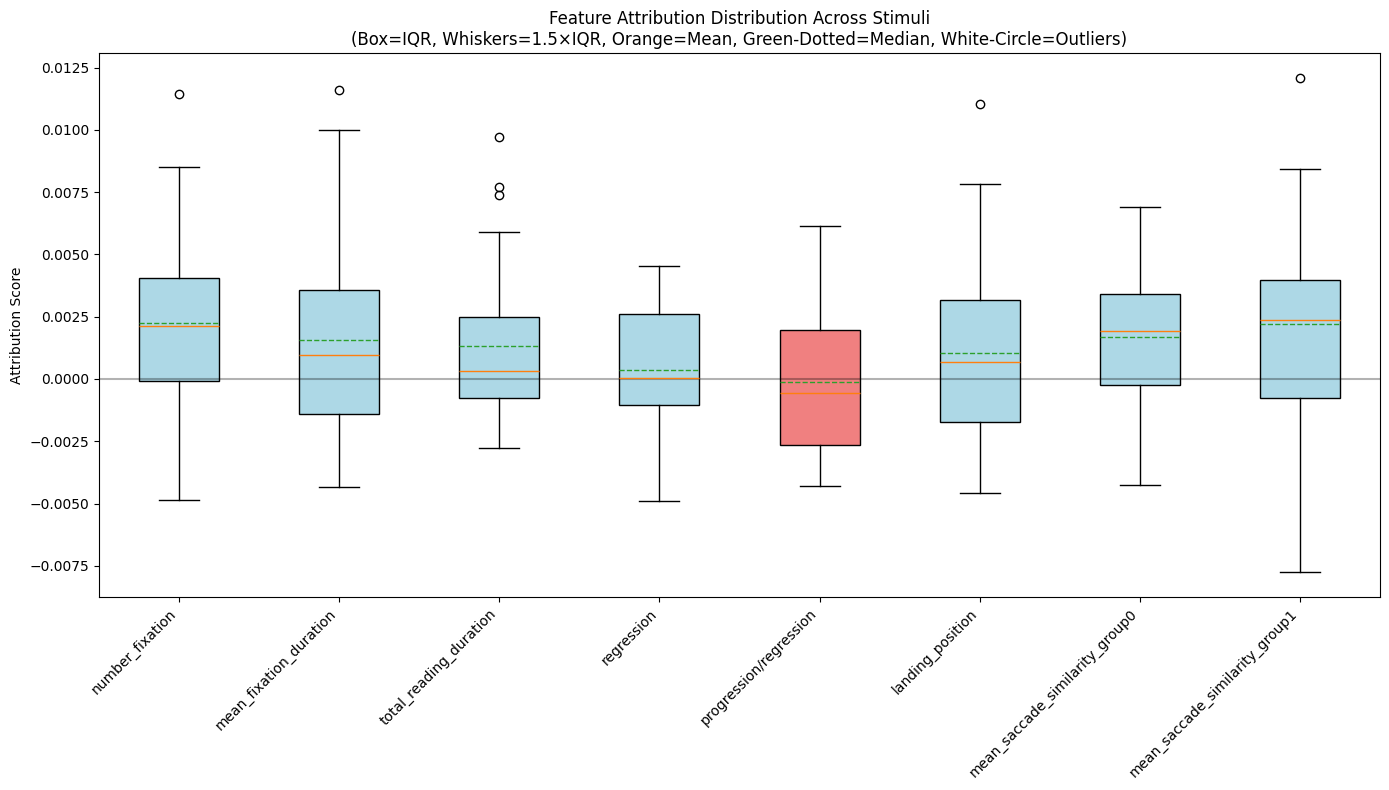


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0022, Std= 0.0034, Min=-0.0049, Max= 0.0115
mean_fixation_duration        : Mean= 0.0016, Std= 0.0043, Min=-0.0043, Max= 0.0116
total_reading_duration        : Mean= 0.0013, Std= 0.0032, Min=-0.0028, Max= 0.0097
regression                    : Mean= 0.0004, Std= 0.0025, Min=-0.0049, Max= 0.0046
progression/regression        : Mean=-0.0001, Std= 0.0028, Min=-0.0043, Max= 0.0062
landing_position              : Mean= 0.0010, Std= 0.0035, Min=-0.0046, Max= 0.0110
mean_saccade_similarity_group0: Mean= 0.0017, Std= 0.0028, Min=-0.0042, Max= 0.0069
mean_saccade_similarity_group1: Mean= 0.0022, Std= 0.0040, Min=-0.0078, Max= 0.0121


In [79]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### ALl features

In [80]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 14))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_saccade_amplitude']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][11] = SimAndFeatureVals[s][0][0][5]
        vector_roi[s][12] = SimAndFeatureVals[s][0][0][6]
        vector_roi[s][13] = SimAndFeatureVals[s][0][0][7]
        
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [84]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(420, 210)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(210, 105)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(105, 53) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(53, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7101581692695618
Epoch 5 loss: 0.4324965476989746
Epoch 10 loss: 0.3582274913787842
Epoch 15 loss: 0.32827895879745483
Epoch 0 loss: 0.6103641390800476
Epoch 5 loss: 0.35679692029953003
Epoch 10 loss: 0.33413851261138916
Epoch 15 loss: 0.33615297079086304
Epoch 0 loss: 0.7153310775756836
Epoch 5 loss: 0.5433629751205444
Epoch 10 loss: 0.36786043643951416
Epoch 15 loss: 0.3306979238986969
Epoch 0 loss: 0.6550670266151428
Epoch 5 loss: 0.4017135202884674
Epoch 10 loss: 0.33956634998321533
Epoch 15 loss: 0.3372649848461151
Epoch 0 loss: 0.7723180651664734
Epoch 5 loss: 0.393957257270813
Epoch 10 loss: 0.3330678343772888
Epoch 15 loss: 0.3286508619785309
Average accuracy: 0.9333333333333332
Standard deviation: 0.054433105395181765
Total confusion matrix:
[[32.  3.]
 [ 0. 10.]]
False positives: 3.0
False negatives: 0.0


In [83]:
_ = train_test_pipeline(stimuli, 0.5) 

Using device: cuda
Epoch 0 loss: 0.7101581692695618
Epoch 5 loss: 0.45114222168922424
Epoch 10 loss: 0.3577021658420563
Epoch 15 loss: 0.337603360414505
Epoch 0 loss: 0.6103641390800476
Epoch 5 loss: 0.3733859658241272
Epoch 10 loss: 0.35049334168434143
Epoch 15 loss: 0.3402268886566162
Epoch 0 loss: 0.7153310775756836
Epoch 5 loss: 0.5185655355453491
Epoch 10 loss: 0.3641568124294281
Epoch 15 loss: 0.3457871973514557
Epoch 0 loss: 0.6550670266151428
Epoch 5 loss: 0.4271863102912903
Epoch 10 loss: 0.35456177592277527
Epoch 15 loss: 0.34595736861228943
Epoch 0 loss: 0.7723180651664734
Epoch 5 loss: 0.40469178557395935
Epoch 10 loss: 0.35166120529174805
Epoch 15 loss: 0.33854252099990845
Average accuracy: 0.9333333333333332
Standard deviation: 0.08888888888888889
Total confusion matrix:
[[33.  2.]
 [ 1.  9.]]
False positives: 2.0
False negatives: 1.0


Approximation Error: -0.0006619006162509322 (< 0.05 is good)

FEATURE ANALYSIS


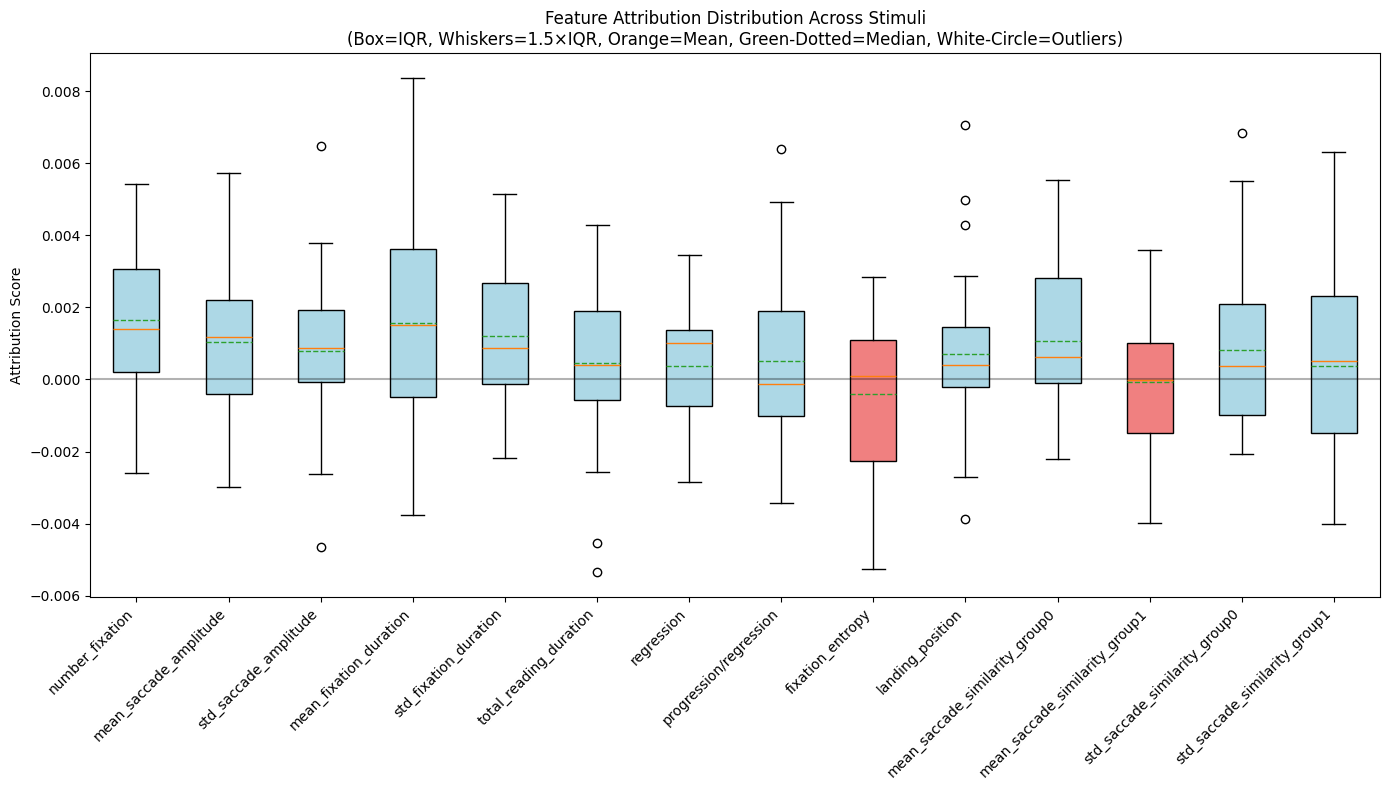


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0017, Std= 0.0020, Min=-0.0026, Max= 0.0054
mean_saccade_amplitude        : Mean= 0.0010, Std= 0.0021, Min=-0.0030, Max= 0.0057
std_saccade_amplitude         : Mean= 0.0008, Std= 0.0021, Min=-0.0047, Max= 0.0065
mean_fixation_duration        : Mean= 0.0016, Std= 0.0028, Min=-0.0038, Max= 0.0084
std_fixation_duration         : Mean= 0.0012, Std= 0.0020, Min=-0.0022, Max= 0.0051
total_reading_duration        : Mean= 0.0005, Std= 0.0023, Min=-0.0054, Max= 0.0043
regression                    : Mean= 0.0004, Std= 0.0017, Min=-0.0028, Max= 0.0035
progression/regression        : Mean= 0.0005, Std= 0.0021, Min=-0.0034, Max= 0.0064
fixation_entropy              : Mean=-0.0004, Std= 0.0022, Min=-0.0053, Max= 0.0028
landing_position              : Mean= 0.0007, Std= 0.0022, Min=-0.0039, Max= 0.0071
mean_saccade_similarity_group0: Mean= 0.0011, Std= 0.0020, Min=-0.002

In [85]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

---

---

## CNN 

We proceed to transform the fixation in a continuous signal and calculate the magnitude of the signal in the time domain that it will be used as input for a convolutional neural network.

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct
from scipy.fft import fft

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [10]:
FixData['Group'].unique()

array([ 4.,  1.,  3.,  2., nan])

In [11]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct, idct
from scipy.fft import fft

In [12]:
def get_data(stim, split_size, batch_size, random_state, verbose=False):
    # Splitting by participants
    # Keep only subjects that start with P
    FixData2 = FixData[FixData['subject'].str.startswith('P')]
    map_subj = [DyslexiaDat.subjects[sub] for sub in set_subj]
    FixData2 = FixData2[~FixData2['subject'].isin(map_subj)]
    Data=FixData2[FixData2['stimulus']==stim]
    subj = Data['subject'].unique()
    train_participants, test_participants = train_test_split(subj, test_size=split_size, random_state=random_state)
    train_data = Data[Data['subject'].isin(train_participants)]
    test_data = Data[Data['subject'].isin(test_participants)]
    train_labels = train_data.groupby('subject')['Group'].first().values
    test_labels = test_data.groupby('subject')['Group'].first().values

    # change train labels
    train_labels = np.array([1 if (np.isnan(val) or val == 1.0 or val == 2.0) else 0 for val in train_labels])
    test_labels = np.array([1 if (np.isnan(val) or val == 1.0 or val == 2.0) else 0 for val in test_labels])

    # Pad the data to the same length (number of rows for subject)
    max_length_train = max(len(train_data[(train_data['subject'] == subj) & 
                                    ((train_data['Group'] == 1.0) | (train_data['Group'] == 2.0))]) 
                     for subj in train_participants)
    max_length_test = max(len(test_data[(test_data['subject'] == subj) &
                                    ((test_data['Group'] == 1.0) | (test_data['Group'] == 2.0))])
                        for subj in test_participants)
    pad = max(max_length_train, max_length_test)

    if verbose:
        print(f"Train participants: {len(train_participants)}")
        print(f"Test participants: {len(test_participants)}")
        print(f"Pad size: {pad}")

    # "Eye tracking based dyslexia detection using a holistic approach"
    # Step 1: Perform DCT Type III (and interpoalte Step 2)
    def perform_dct_interpolate(data, pad_size):
        # sqrt(2/pad_size) * cn * cos((pi * ((2*k + 1) * n)) / (2 * pad_size)) k = 0, 1, ..., pad_size - 1 n = 0, 1, ..., pad_size - 1
        dct_result = np.zeros((pad_size, data.shape[1]))
        for axis in range(data.shape[1]):
            c = dct(data[:, axis], type=3, norm='ortho')
            dct_result[:, axis] = np.pad(c, (0, pad_size-len(c)))
        return dct_result
        
    # Step 3: Perform IDCT Type III
    def perform_idct(coeffs):
        idct_result = np.zeros_like(coeffs)
        for axis in range(coeffs.shape[1]):
            idct_result[:, axis] = idct(coeffs[:, axis], type=3, norm='ortho')
        return idct_result

    # Step 4: Energy correction based on number of zeros
    def correct_energy(data, original_length):
        # Calculate the ratio of the original length to the padded length
        ratio = original_length / data.shape[0]
        return data * ratio

    # Step 5: Perform Discrete Fourier Transform (DFT)
    def perfrom_dft(data):
        return fft(data, axis=0) / data.shape[0]

    # Step 6: Magnitude calculation
    def calculate_magnitude(data):
        return np.abs(data)

    def data_output(data, pad_size):
        dct_result = perform_dct_interpolate(data, pad_size)
        idct_result = perform_idct(dct_result)
        corrected_data = correct_energy(idct_result, len(data))
        dft_result = perfrom_dft(corrected_data)
        magnitude = calculate_magnitude(dft_result)
        #for the final data we can return just N/2 as the data is symmetric
        final_data = magnitude[1:magnitude.shape[0] // 2]
        return final_data

    
    # Apply the pipeline to all participants

    train_features = []
    test_features = []
    for subj in train_participants:
        data = train_data[train_data['subject'] == subj].iloc[:, 5:7].values
        train_features.append(data_output(data, pad))
    
    for subj in test_participants:
        data = test_data[test_data['subject'] == subj].iloc[:, 5:7].values
        test_features.append(data_output(data, pad))

    # Convert to PyTorch tensors
    train_features = torch.tensor(train_features, dtype=torch.float32)
    test_features = torch.tensor(test_features, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.float32).unsqueeze(1)
    test_labels = torch.tensor(test_labels, dtype=torch.float32).unsqueeze(1)
    
    # Create DataLoader
    train_dataset = TensorDataset(train_features, train_labels)
    test_dataset = TensorDataset(test_features, test_labels)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    
    return train_loader, test_loader, train_features, train_labels, test_features, test_labels

In [13]:
stimulus = DyslexiaDat.stimuli[12]

In [14]:
# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Enable verbose mode
verbose = True

# Load data
train_loader, test_loader, train_data, train_labels, test_data, test_labels = get_data(
    stim=stimulus, split_size=0.1, batch_size=32, random_state=42, verbose=True
)

Train participants: 23
Test participants: 3
Pad size: 60


C:\Users\nickp\AppData\Local\Temp\ipykernel_15768\1522047402.py:88: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  train_features = torch.tensor(train_features, dtype=torch.float32)


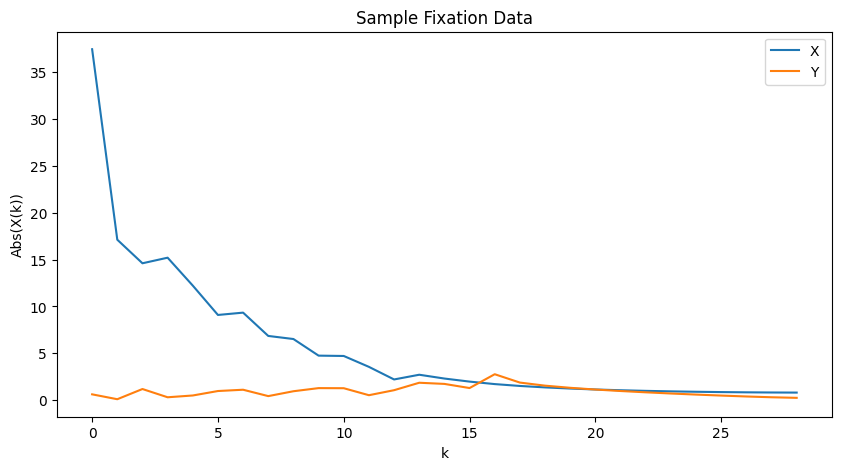

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(train_data[0, :, 0], label='X')
plt.plot(test_data[0, :, 1], label='Y')
plt.xlabel('k')
plt.ylabel('Abs(X(k))')
plt.title('Sample Fixation Data')
plt.legend()
plt.show()

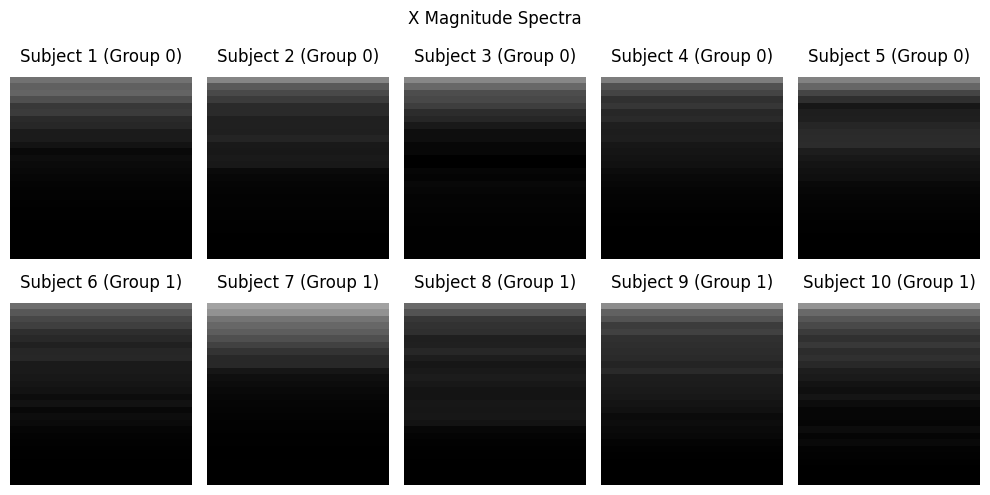

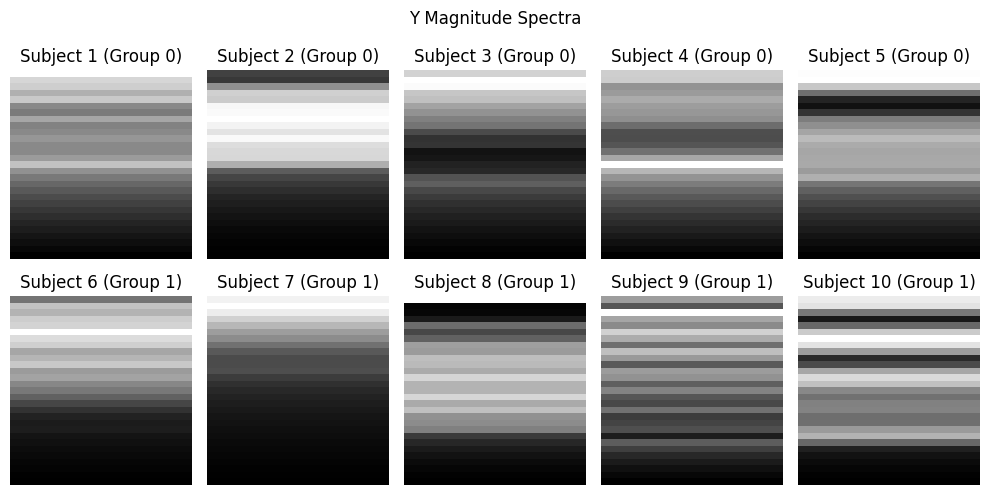

In [16]:
def plot_group_spectra(features, labels, title, channel):
    """
    Plots magnitude spectra for 5 subjects with label 0 vs. 5 subjects with label 1
    in a vertical grayscale heatmap.
    """
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(2, 5, i + 1)
        plt.imshow(features[labels.squeeze() == 0][i][:, channel].reshape(-1, 1), aspect='auto', cmap='gray')
        plt.title(f'Subject {i+1} (Group 0)')
        plt.axis('off')

    for i in range(5):
        plt.subplot(2, 5, i + 6)
        plt.imshow(features[labels.squeeze() == 1][i][:, channel].reshape(-1, 1), aspect='auto', cmap='gray')
        plt.title(f'Subject {i+6} (Group 1)')
        plt.axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    
# Plot for X and Y magnitudes
plot_group_spectra(train_data, train_labels, 'X Magnitude Spectra', channel=0)
plot_group_spectra(train_data, train_labels, 'Y Magnitude Spectra', channel=1)

In [17]:
class CNN(nn.Module):
    def __init__(self, num_classes: int, input_channels: int = 2, input_length: int = 248,
                 hidden_fc: int = 64):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv1d(input_channels, 8, kernel_size=3, stride=1),
            nn.BatchNorm1d(8),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(8, 16, kernel_size=3, stride=1),
            nn.BatchNorm1d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),
        )

        with torch.no_grad():
            dummy = torch.zeros(1, input_channels, input_length)
            n_flat = self.features(dummy).numel()

        self.classifier = nn.Sequential(
            nn.Linear(n_flat, hidden_fc),
            nn.ReLU(inplace=True),
            nn.Linear(hidden_fc, num_classes)
        )

    def forward(self, x):
        if x.shape[1] != 2: 
            x = x.transpose(1, 2)
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

In [18]:
# ---------------------
# Setup training
# ---------------------

torch.manual_seed(42)
np.random.seed(42)

accuracy = []

for i in range(5):
    # Load data
    train_loader, test_loader, train_data, train_labels, test_data, test_labels = get_data(
    stim=stimulus, split_size=0.1, batch_size=32, random_state=i
    )
    input_len = train_data.shape[1]
    num_epochs = 20  # Adjust as needed
    # Determine number of classes from training labels.
    # Here we assume train_labels is a tensor containing integer class labels.
    num_classes = len(torch.unique(train_labels))
    model = CNN(num_classes, input_length=input_len).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.8)
    # ---------------------
    # Training loop
    # ---------------------
    num_epochs = 20  # Adjust as needed
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for features, labels in train_loader:
            # Move data to device
            features, labels = features.to(device), labels.to(device)
            labels = labels.squeeze().long()
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * features.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        # print every 10 epochs
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

    # ---------------------
    # Evaluation
    # ---------------------
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in test_loader:
            # Move data to device
            features, labels = features.to(device), labels.to(device)
            labels = labels.squeeze()
            outputs = model(features)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy.append(100 * correct / total)
    
print(f"Average Test Accuracy: {np.mean(accuracy):.2f}%")
print(f"Standard Deviation: {np.std(accuracy):.2f}")

Epoch 5/20, Loss: 0.6028
Epoch 10/20, Loss: 0.5586
Epoch 15/20, Loss: 0.5367
Epoch 20/20, Loss: 0.5064
Epoch 5/20, Loss: 0.6563
Epoch 10/20, Loss: 0.5489
Epoch 15/20, Loss: 0.5125
Epoch 20/20, Loss: 0.4891
Epoch 5/20, Loss: 0.5605
Epoch 10/20, Loss: 0.5065
Epoch 15/20, Loss: 0.4647
Epoch 20/20, Loss: 0.4266
Epoch 5/20, Loss: 0.6152
Epoch 10/20, Loss: 0.5255
Epoch 15/20, Loss: 0.4825
Epoch 20/20, Loss: 0.4513
Epoch 5/20, Loss: 0.5236
Epoch 10/20, Loss: 0.4522
Epoch 15/20, Loss: 0.4277
Epoch 20/20, Loss: 0.3983
Average Test Accuracy: 86.67%
Standard Deviation: 16.33


## Multiple stimuli

In [19]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct, idct
from scipy.fft import fft
import numpy as np
import torch

def get_data(stim_list, split_size, batch_size, random_state, verbose=False):
    # Filter by stimuli list and keep only subjects that start with 'P'
    FixData2 = FixData[FixData['subject'].str.startswith('P')]
    map_subj = [DyslexiaDat.subjects[sub] for sub in set_subj]
    FixData2 = FixData2[~FixData2['subject'].isin(map_subj)]
    Data = FixData2[FixData2['stimulus'].isin(stim_list)]
    subj = Data['subject'].unique()

    participant_labels = (
        Data.groupby('subject')['Group']
            .first()
            .apply(lambda v: 1 if (pd.isna(v) or v in (1.0, 2.0)) else 0)
            .loc[subj]
            .values
    )

    # Split by participants
    train_participants, test_participants = train_test_split(subj, test_size=split_size, random_state=random_state, stratify=participant_labels)
    train_data = Data[Data['subject'].isin(train_participants)]
    test_data = Data[Data['subject'].isin(test_participants)]
    
    train_labels = train_data.groupby('subject')['Group'].first().values
    test_labels = test_data.groupby('subject')['Group'].first().values

    # Binary label transformation
    train_labels = np.array([1 if (np.isnan(val) or val == 1.0 or val == 2.0) else 0 for val in train_labels])
    test_labels = np.array([1 if (np.isnan(val) or val == 1.0 or val == 2.0) else 0 for val in test_labels])

    # Determine padding size
    pad = 0
    for stim in stim_list:
        max_length_train = max(len(train_data[(train_data['subject'] == subj) & (train_data['stimulus'] == stim) &
                                            ((train_data['Group'] == 1.0) | (train_data['Group'] == 2.0))]) 
                            for subj in train_participants)
        max_length_test = max(len(test_data[(test_data['subject'] == subj)  & (test_data['stimulus'] == stim) &
                                            ((test_data['Group'] == 1.0) | (test_data['Group'] == 2.0))]) 
                            for subj in test_participants)
        pad = max(pad, max_length_train, max_length_test)

    if verbose:
        print(f"Train participants: {len(train_participants)}")
        print(f"Test participants: {len(test_participants)}")
        print(f"Pad size: {pad}")
        print(f"Using stimuli: {stim_list}")

    # "Eye tracking based dyslexia detection using a holistic approach"
    # Step 1: Perform DCT Type III (and interpoalte Step 2)
    def perform_dct_interpolate(data, pad_size):
        # sqrt(2/pad_size) * cn * cos((pi * ((2*k + 1) * n)) / (2 * pad_size)) k = 0, 1, ..., pad_size - 1 n = 0, 1, ..., pad_size - 1
        dct_result = np.zeros((pad_size, data.shape[1]))
        for axis in range(data.shape[1]):
            c = dct(data[:, axis], type=3, norm='ortho')
            dct_result[:, axis] = np.pad(c, (0, pad_size-len(c)))
        return dct_result
        
    # Step 3: Perform IDCT Type III
    def perform_idct(coeffs):
        idct_result = np.zeros_like(coeffs)
        for axis in range(coeffs.shape[1]):
            idct_result[:, axis] = idct(coeffs[:, axis], type=3, norm='ortho')
        return idct_result

    # Step 4: Energy correction based on number of zeros
    def correct_energy(data, original_length):
        # Calculate the ratio of the original length to the padded length
        ratio = original_length / data.shape[0]
        return data * ratio

    # Step 5: Perform Discrete Fourier Transform (DFT)
    def perfrom_dft(data):
        return fft(data, axis=0) / data.shape[0]

    # Step 6: Magnitude calculation
    def calculate_magnitude(data):
        return np.abs(data)

    def data_output(data, pad_size):
        dct_result = perform_dct_interpolate(data, pad_size)
        idct_result = perform_idct(dct_result)
        corrected_data = correct_energy(idct_result, len(data))
        dft_result = perfrom_dft(corrected_data)
        magnitude = calculate_magnitude(dft_result)
        #for the final data we can return just N/2 as the data is symmetric
        final_data = magnitude[1:magnitude.shape[0] // 2]
        return final_data

    # Process all train/test participants
    train_features = []
    test_features = []
    len_out = pad // 2  - 1  # Adjusted to match the final output size

    for subj in train_participants:
        for stim in stim_list:
            tr = train_data[(train_data['subject'] == subj) & (train_data['stimulus'] == stim)]
            if tr.empty:
                d = np.zeros((len_out, 2))
            else:
                data = tr.iloc[:, 5:7].values
                d = data_output(data, pad)
            train_features.append(d)

    for subj in test_participants:
        for stim in stim_list:
            tr = test_data[(test_data['subject'] == subj) & (test_data['stimulus'] == stim)]
            if tr.empty:
                d = np.zeros((len_out, 2))
            else:
                data = tr.iloc[:, 5:7].values
                d = data_output(data, pad)
            test_features.append(d)

    # Convert to PyTorch tensors
    train_features = torch.tensor(train_features, dtype=torch.float32)
    test_features = torch.tensor(test_features, dtype=torch.float32)
    train_labels = np.repeat(train_labels, len(stim_list))
    test_labels  = np.repeat(test_labels,  len(stim_list))

    train_labels = torch.tensor(train_labels, dtype=torch.float32).unsqueeze(1)
    test_labels  = torch.tensor(test_labels,  dtype=torch.float32).unsqueeze(1)

    # Shuffle the data maintaining the correspondence between features and labels
    perm_train = torch.randperm(train_features.size(0))
    train_features = train_features[perm_train]
    train_labels = train_labels[perm_train]
    perm_test = torch.randperm(test_features.size(0))
    test_features = test_features[perm_test]
    test_labels = test_labels[perm_test]

    # Create DataLoaders
    train_dataset = TensorDataset(train_features, train_labels)
    test_dataset = TensorDataset(test_features, test_labels)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    return train_loader, test_loader, train_features, train_labels, test_features, test_labels


In [20]:
# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load data
train_loader, test_loader, train_data, train_labels, test_data, test_labels = get_data(
    stim_list=list(range(1, 31)), split_size=0.1, batch_size=32, random_state=42, verbose=True
)

print(f"Train data shape: {train_data.shape}, Train labels shape: {train_labels.shape}")

Train participants: 23
Test participants: 3
Pad size: 117
Using stimuli: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Train data shape: torch.Size([690, 57, 2]), Train labels shape: torch.Size([690, 1])


In [21]:
class CNN(nn.Module):
    def __init__(self, num_classes: int, input_channels: int = 2, input_length: int = 248,
                 hidden_fc: int = 64):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv1d(input_channels, 8, kernel_size=3, stride=1),
            nn.BatchNorm1d(8),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(8, 16, kernel_size=3, stride=1),
            nn.BatchNorm1d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),
        )

        with torch.no_grad():
            dummy = torch.zeros(1, input_channels, input_length)
            n_flat = self.features(dummy).numel()

        self.classifier = nn.Sequential(
            nn.Linear(n_flat, hidden_fc),
            nn.ReLU(inplace=True),
            nn.Linear(hidden_fc, num_classes)
        )

    def forward(self, x):
        if x.shape[1] != 2: 
            x = x.transpose(1, 2)
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

In [22]:
# ---------------------
# Setup training
# ---------------------

torch.manual_seed(42)
np.random.seed(42)

def train_test(batch_size=64, momentum=1, lr=0.01):
    torch.manual_seed(42)
    np.random.seed(42)

    accuracy = []

    for i in range(5):
        # Load data
        train_loader, test_loader, train_data, train_labels, test_data, test_labels = get_data(
            stim_list=list(range(1, 31)), split_size=0.1, batch_size=batch_size, random_state=i
        )
        input_len = train_data.shape[1]
        num_classes = len(torch.unique(train_labels))
        model = CNN(num_classes, input_length=input_len).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
        # ---------------------
        # Training loop
        # ---------------------
        num_epochs = 50
        for epoch in range(num_epochs):
            model.train()
            running_loss = 0.0
            for features, labels in train_loader:
                # Move data to device
                features, labels = features.to(device), labels.to(device)
                labels = labels.squeeze().long()
                optimizer.zero_grad()
                outputs = model(features)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item() * features.size(0)
            
            epoch_loss = running_loss / len(train_loader.dataset)
            # print every 10 epochs
            if (epoch + 1) % 5 == 0:
                print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

        # ---------------------
        # Evaluation
        # ---------------------
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for features, labels in test_loader:
                # Move data to device
                features, labels = features.to(device), labels.to(device)
                labels = labels.squeeze()
                outputs = model(features)
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        accuracy.append(100 * correct / total)
        
    print(f"Average Test Accuracy: {np.mean(accuracy):.2f}%")
    print(f"Standard Deviation: {np.std(accuracy):.2f}")

In [23]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.01)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.01)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.01)

Batch size: 16
Epoch 5/50, Loss: 0.5161
Epoch 10/50, Loss: 0.5245
Epoch 15/50, Loss: 0.5520
Epoch 20/50, Loss: 0.5237
Epoch 25/50, Loss: 0.5225
Epoch 30/50, Loss: 0.5397
Epoch 35/50, Loss: 0.5416
Epoch 40/50, Loss: 0.5617
Epoch 45/50, Loss: 0.5457
Epoch 50/50, Loss: 0.5287
Epoch 5/50, Loss: 0.5236
Epoch 10/50, Loss: 0.5446
Epoch 15/50, Loss: 0.5352
Epoch 20/50, Loss: 0.5343
Epoch 25/50, Loss: 0.9789
Epoch 30/50, Loss: 0.5342
Epoch 35/50, Loss: 0.5374
Epoch 40/50, Loss: 0.5329
Epoch 45/50, Loss: 0.5409
Epoch 50/50, Loss: 0.5476
Epoch 5/50, Loss: 0.5411
Epoch 10/50, Loss: 0.5251
Epoch 15/50, Loss: 0.5328
Epoch 20/50, Loss: 0.5343
Epoch 25/50, Loss: 0.5519
Epoch 30/50, Loss: 0.5631
Epoch 35/50, Loss: 0.5817
Epoch 40/50, Loss: 0.5389
Epoch 45/50, Loss: 0.5704
Epoch 50/50, Loss: 0.5729
Epoch 5/50, Loss: 0.5623
Epoch 10/50, Loss: 0.5453
Epoch 15/50, Loss: 0.5402
Epoch 20/50, Loss: 0.5256
Epoch 25/50, Loss: 0.5346
Epoch 30/50, Loss: 0.5367
Epoch 35/50, Loss: 0.5543
Epoch 40/50, Loss: 0.5920
E

In [24]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.01, momentum=0.5)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.01, momentum=0.5)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.01, momentum=0.5)

Batch size: 16
Epoch 5/50, Loss: 0.5065
Epoch 10/50, Loss: 0.4885
Epoch 15/50, Loss: 0.4686
Epoch 20/50, Loss: 0.4563
Epoch 25/50, Loss: 0.4460
Epoch 30/50, Loss: 0.4311
Epoch 35/50, Loss: 0.4186
Epoch 40/50, Loss: 0.3897
Epoch 45/50, Loss: 0.3738
Epoch 50/50, Loss: 0.3655
Epoch 5/50, Loss: 0.5025
Epoch 10/50, Loss: 0.4939
Epoch 15/50, Loss: 0.4838
Epoch 20/50, Loss: 0.4782
Epoch 25/50, Loss: 0.4645
Epoch 30/50, Loss: 0.4587
Epoch 35/50, Loss: 0.4466
Epoch 40/50, Loss: 0.4370
Epoch 45/50, Loss: 0.4278
Epoch 50/50, Loss: 0.4064
Epoch 5/50, Loss: 0.5195
Epoch 10/50, Loss: 0.4890
Epoch 15/50, Loss: 0.4746
Epoch 20/50, Loss: 0.4543
Epoch 25/50, Loss: 0.4684
Epoch 30/50, Loss: 0.4514
Epoch 35/50, Loss: 0.4205
Epoch 40/50, Loss: 0.4192
Epoch 45/50, Loss: 0.4084
Epoch 50/50, Loss: 0.3919
Epoch 5/50, Loss: 0.4991
Epoch 10/50, Loss: 0.4766
Epoch 15/50, Loss: 0.4631
Epoch 20/50, Loss: 0.4927
Epoch 25/50, Loss: 0.4503
Epoch 30/50, Loss: 0.4332
Epoch 35/50, Loss: 0.4165
Epoch 40/50, Loss: 0.4086
E

In [25]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.1)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.1)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.1)

Batch size: 16
Epoch 5/50, Loss: 0.5436
Epoch 10/50, Loss: 0.9384
Epoch 15/50, Loss: 1.5119
Epoch 20/50, Loss: 1.4056
Epoch 25/50, Loss: 2.5850
Epoch 30/50, Loss: 2.5997
Epoch 35/50, Loss: 1.6291
Epoch 40/50, Loss: 1.0598
Epoch 45/50, Loss: 0.7286
Epoch 50/50, Loss: 0.9388
Epoch 5/50, Loss: 0.8125
Epoch 10/50, Loss: 4.7895
Epoch 15/50, Loss: 4.1678
Epoch 20/50, Loss: 1.5578
Epoch 25/50, Loss: 1.2920
Epoch 30/50, Loss: 14222621.8947
Epoch 35/50, Loss: 1.0589
Epoch 40/50, Loss: 2.5581
Epoch 45/50, Loss: 1.8528
Epoch 50/50, Loss: 2.1090
Epoch 5/50, Loss: 0.9506
Epoch 10/50, Loss: 2.0008
Epoch 15/50, Loss: 2.8844
Epoch 20/50, Loss: 2.1318
Epoch 25/50, Loss: 2.0488
Epoch 30/50, Loss: 1.4339
Epoch 35/50, Loss: 1.6323
Epoch 40/50, Loss: 1.4987
Epoch 45/50, Loss: 1.7819
Epoch 50/50, Loss: 2.5505
Epoch 5/50, Loss: 0.8655
Epoch 10/50, Loss: 6.5307
Epoch 15/50, Loss: 0.8613
Epoch 20/50, Loss: 0.8613
Epoch 25/50, Loss: 0.6426
Epoch 30/50, Loss: 1.1504
Epoch 35/50, Loss: 1.1375
Epoch 40/50, Loss: 1

In [26]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.1, momentum=0.5)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.1, momentum=0.5)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.1, momentum=0.5)

Batch size: 16
Epoch 5/50, Loss: 0.5076
Epoch 10/50, Loss: 0.4890
Epoch 15/50, Loss: 0.4733
Epoch 20/50, Loss: 0.4794
Epoch 25/50, Loss: 0.4312
Epoch 30/50, Loss: 0.3817
Epoch 35/50, Loss: 0.3874
Epoch 40/50, Loss: 0.3405
Epoch 45/50, Loss: 0.4308
Epoch 50/50, Loss: 0.2744
Epoch 5/50, Loss: 0.5179
Epoch 10/50, Loss: 0.5005
Epoch 15/50, Loss: 0.4827
Epoch 20/50, Loss: 0.4889
Epoch 25/50, Loss: 0.4638
Epoch 30/50, Loss: 0.4567
Epoch 35/50, Loss: 0.4580
Epoch 40/50, Loss: 0.4499
Epoch 45/50, Loss: 0.4274
Epoch 50/50, Loss: 0.4417
Epoch 5/50, Loss: 0.5077
Epoch 10/50, Loss: 0.4706
Epoch 15/50, Loss: 0.4486
Epoch 20/50, Loss: 0.4131
Epoch 25/50, Loss: 0.4444
Epoch 30/50, Loss: 0.5196
Epoch 35/50, Loss: 0.4320
Epoch 40/50, Loss: 0.4287
Epoch 45/50, Loss: 0.3762
Epoch 50/50, Loss: 0.3226
Epoch 5/50, Loss: 0.4961
Epoch 10/50, Loss: 0.4712
Epoch 15/50, Loss: 0.4536
Epoch 20/50, Loss: 0.4633
Epoch 25/50, Loss: 0.4374
Epoch 30/50, Loss: 0.4226
Epoch 35/50, Loss: 0.4059
Epoch 40/50, Loss: 0.3842
E

In [27]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self,
                 num_classes: int,
                 input_channels: int = 2,
                 input_length:   int = 248,
                 hidden_fc:      int = 64):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv1d(input_channels, 8,  kernel_size=3, stride=1),
            nn.BatchNorm1d(8),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(8, 16, kernel_size=3, stride=1),
            nn.BatchNorm1d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(16, 32, kernel_size=3, stride=1),
            nn.BatchNorm1d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),
        )

        with torch.no_grad():
            dummy = torch.zeros(1, input_channels, input_length)
            n_flat = self.features(dummy).numel()

        self.classifier = nn.Sequential(
            nn.Linear(n_flat, hidden_fc),
            nn.ReLU(inplace=True),
            nn.Linear(hidden_fc, num_classes)
        )

    # --------------------------------------
    def forward(self, x):
        if x.dim() == 3 and x.size(1) != 2:
            x = x.transpose(1, 2)

        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)


In [28]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.01)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.01)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.01)

Batch size: 16
Epoch 5/50, Loss: 0.5277
Epoch 10/50, Loss: 0.5295
Epoch 15/50, Loss: 0.5250
Epoch 20/50, Loss: 0.5273
Epoch 25/50, Loss: 0.5303
Epoch 30/50, Loss: 0.5274
Epoch 35/50, Loss: 0.6466
Epoch 40/50, Loss: 0.5392
Epoch 45/50, Loss: 0.5685
Epoch 50/50, Loss: 0.5287
Epoch 5/50, Loss: 0.6128
Epoch 10/50, Loss: 0.5595
Epoch 15/50, Loss: 0.5345
Epoch 20/50, Loss: 0.5803
Epoch 25/50, Loss: 0.5327
Epoch 30/50, Loss: 0.5364
Epoch 35/50, Loss: 0.5537
Epoch 40/50, Loss: 0.5267
Epoch 45/50, Loss: 0.5602
Epoch 50/50, Loss: 0.7056
Epoch 5/50, Loss: 0.5698
Epoch 10/50, Loss: 0.5605
Epoch 15/50, Loss: 0.5262
Epoch 20/50, Loss: 0.5285
Epoch 25/50, Loss: 0.5634
Epoch 30/50, Loss: 0.5297
Epoch 35/50, Loss: 0.5417
Epoch 40/50, Loss: 0.5338
Epoch 45/50, Loss: 0.5483
Epoch 50/50, Loss: 0.5453
Epoch 5/50, Loss: 0.5460
Epoch 10/50, Loss: 0.5383
Epoch 15/50, Loss: 0.5140
Epoch 20/50, Loss: 0.5329
Epoch 25/50, Loss: 0.5785
Epoch 30/50, Loss: 0.6054
Epoch 35/50, Loss: 0.5758
Epoch 40/50, Loss: 0.5670
E

In [29]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.01, momentum=0.5)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.01, momentum=0.5)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.01, momentum=0.5)

Batch size: 16
Epoch 5/50, Loss: 0.4927
Epoch 10/50, Loss: 0.4722
Epoch 15/50, Loss: 0.4537
Epoch 20/50, Loss: 0.4427
Epoch 25/50, Loss: 0.4133
Epoch 30/50, Loss: 0.4260
Epoch 35/50, Loss: 0.4203
Epoch 40/50, Loss: 0.3418
Epoch 45/50, Loss: 0.3270
Epoch 50/50, Loss: 0.3846
Epoch 5/50, Loss: 0.4950
Epoch 10/50, Loss: 0.4827
Epoch 15/50, Loss: 0.4514
Epoch 20/50, Loss: 0.4334
Epoch 25/50, Loss: 0.4097
Epoch 30/50, Loss: 0.4002
Epoch 35/50, Loss: 0.3662
Epoch 40/50, Loss: 0.3369
Epoch 45/50, Loss: 0.3644
Epoch 50/50, Loss: 0.2863
Epoch 5/50, Loss: 0.4938
Epoch 10/50, Loss: 0.4882
Epoch 15/50, Loss: 0.4483
Epoch 20/50, Loss: 0.4133
Epoch 25/50, Loss: 0.4081
Epoch 30/50, Loss: 0.3664
Epoch 35/50, Loss: 0.3538
Epoch 40/50, Loss: 0.3960
Epoch 45/50, Loss: 0.3071
Epoch 50/50, Loss: 0.3111
Epoch 5/50, Loss: 0.4900
Epoch 10/50, Loss: 0.4579
Epoch 15/50, Loss: 0.4511
Epoch 20/50, Loss: 0.4257
Epoch 25/50, Loss: 0.3810
Epoch 30/50, Loss: 0.3946
Epoch 35/50, Loss: 0.4473
Epoch 40/50, Loss: 0.3626
E

In [30]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.1)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.1)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.1)

Batch size: 16
Epoch 5/50, Loss: 0.5461
Epoch 10/50, Loss: 0.7495
Epoch 15/50, Loss: 1.6195
Epoch 20/50, Loss: 1.5494
Epoch 25/50, Loss: 1.0928
Epoch 30/50, Loss: 1.4313
Epoch 35/50, Loss: 1.6702
Epoch 40/50, Loss: 2.9175
Epoch 45/50, Loss: 2.3100
Epoch 50/50, Loss: 4.9107
Epoch 5/50, Loss: 0.6638
Epoch 10/50, Loss: 0.9411
Epoch 15/50, Loss: 0.5256
Epoch 20/50, Loss: 0.7222
Epoch 25/50, Loss: 1.1147
Epoch 30/50, Loss: 1.4271
Epoch 35/50, Loss: 1.0673
Epoch 40/50, Loss: 1.5378
Epoch 45/50, Loss: 0.7402
Epoch 50/50, Loss: 0.5812
Epoch 5/50, Loss: 0.5874
Epoch 10/50, Loss: 0.5895
Epoch 15/50, Loss: 0.5470
Epoch 20/50, Loss: 0.6452
Epoch 25/50, Loss: 0.9489
Epoch 30/50, Loss: 1.2337
Epoch 35/50, Loss: 1.6297
Epoch 40/50, Loss: 1.5113
Epoch 45/50, Loss: 1.3836
Epoch 50/50, Loss: 1.4829
Epoch 5/50, Loss: 1.0382
Epoch 10/50, Loss: 1.0296
Epoch 15/50, Loss: 0.9376
Epoch 20/50, Loss: 0.7624
Epoch 25/50, Loss: 0.6412
Epoch 30/50, Loss: 0.5408
Epoch 35/50, Loss: 0.7537
Epoch 40/50, Loss: 1.4489
E

In [31]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.1, momentum=0.5)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.1, momentum=0.5)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.1, momentum=0.5)

Batch size: 16
Epoch 5/50, Loss: 0.4871
Epoch 10/50, Loss: 0.4905
Epoch 15/50, Loss: 0.4845
Epoch 20/50, Loss: 0.4630
Epoch 25/50, Loss: 0.4607
Epoch 30/50, Loss: 0.4819
Epoch 35/50, Loss: 0.4746
Epoch 40/50, Loss: 0.4169
Epoch 45/50, Loss: 0.3810
Epoch 50/50, Loss: 0.3504
Epoch 5/50, Loss: 0.4963
Epoch 10/50, Loss: 0.5101
Epoch 15/50, Loss: 0.4625
Epoch 20/50, Loss: 0.4664
Epoch 25/50, Loss: 0.4447
Epoch 30/50, Loss: 0.4439
Epoch 35/50, Loss: 0.4388
Epoch 40/50, Loss: 0.4016
Epoch 45/50, Loss: 0.4114
Epoch 50/50, Loss: 0.3386
Epoch 5/50, Loss: 0.4982
Epoch 10/50, Loss: 0.4979
Epoch 15/50, Loss: 0.4557
Epoch 20/50, Loss: 0.4157
Epoch 25/50, Loss: 0.4452
Epoch 30/50, Loss: 0.3686
Epoch 35/50, Loss: 0.3482
Epoch 40/50, Loss: 0.3847
Epoch 45/50, Loss: 0.3325
Epoch 50/50, Loss: 0.3170
Epoch 5/50, Loss: 0.5120
Epoch 10/50, Loss: 0.4874
Epoch 15/50, Loss: 0.4813
Epoch 20/50, Loss: 0.4494
Epoch 25/50, Loss: 0.4198
Epoch 30/50, Loss: 0.4037
Epoch 35/50, Loss: 0.4036
Epoch 40/50, Loss: 0.3399
E

In [32]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self,
                 num_classes:   int,
                 input_channels:int = 2,
                 input_length:  int = 248,
                 hidden_fc:     int = 64):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv1d(input_channels,  8, kernel_size=3, stride=1),
            nn.BatchNorm1d(8),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(8, 16, kernel_size=3, stride=1),
            nn.BatchNorm1d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(16, 32, kernel_size=3, stride=1),
            nn.BatchNorm1d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(32, 64, kernel_size=3, stride=1),
            nn.BatchNorm1d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),
        )

        with torch.no_grad():
            dummy = torch.zeros(1, input_channels, input_length)
            n_flat = self.features(dummy).numel()

        self.classifier = nn.Sequential(
            nn.Linear(n_flat, hidden_fc),
            nn.ReLU(inplace=True),
            nn.Linear(hidden_fc, num_classes) 
        )

    def forward(self, x):
        if x.dim() == 3 and x.size(1) != 2:
            x = x.transpose(1, 2)

        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

In [33]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.01)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.01)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.01)

Batch size: 16
Epoch 5/50, Loss: 0.5201
Epoch 10/50, Loss: 0.5272
Epoch 15/50, Loss: 0.5194
Epoch 20/50, Loss: 0.5294
Epoch 25/50, Loss: 0.5448
Epoch 30/50, Loss: 0.5778
Epoch 35/50, Loss: 0.5560
Epoch 40/50, Loss: 0.5825
Epoch 45/50, Loss: 0.5887
Epoch 50/50, Loss: 0.5978
Epoch 5/50, Loss: 0.5287
Epoch 10/50, Loss: 0.5397
Epoch 15/50, Loss: 0.5322
Epoch 20/50, Loss: 0.5233
Epoch 25/50, Loss: 0.5421
Epoch 30/50, Loss: 0.5344
Epoch 35/50, Loss: 0.5473
Epoch 40/50, Loss: 0.5892
Epoch 45/50, Loss: 0.6248
Epoch 50/50, Loss: 0.6004
Epoch 5/50, Loss: 0.5339
Epoch 10/50, Loss: 0.5255
Epoch 15/50, Loss: 0.5238
Epoch 20/50, Loss: 0.5328
Epoch 25/50, Loss: 0.5270
Epoch 30/50, Loss: 0.5307
Epoch 35/50, Loss: 0.5641
Epoch 40/50, Loss: 0.5509
Epoch 45/50, Loss: 0.5678
Epoch 50/50, Loss: 0.6963
Epoch 5/50, Loss: 0.5783
Epoch 10/50, Loss: 0.5434
Epoch 15/50, Loss: 0.5249
Epoch 20/50, Loss: 0.5468
Epoch 25/50, Loss: 0.5475
Epoch 30/50, Loss: 0.5329
Epoch 35/50, Loss: 0.5400
Epoch 40/50, Loss: 0.5506
E

In [34]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.01, momentum=0.5)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.01, momentum=0.5)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.01, momentum=0.5)

Batch size: 16
Epoch 5/50, Loss: 0.4912
Epoch 10/50, Loss: 0.4741
Epoch 15/50, Loss: 0.4650
Epoch 20/50, Loss: 0.4348
Epoch 25/50, Loss: 0.4119
Epoch 30/50, Loss: 0.3994
Epoch 35/50, Loss: 0.3546
Epoch 40/50, Loss: 0.4033
Epoch 45/50, Loss: 0.3298
Epoch 50/50, Loss: 0.3681
Epoch 5/50, Loss: 0.4692
Epoch 10/50, Loss: 0.4560
Epoch 15/50, Loss: 0.4625
Epoch 20/50, Loss: 0.4186
Epoch 25/50, Loss: 0.3863
Epoch 30/50, Loss: 0.4374
Epoch 35/50, Loss: 0.3929
Epoch 40/50, Loss: 0.3695
Epoch 45/50, Loss: 0.3716
Epoch 50/50, Loss: 0.3207
Epoch 5/50, Loss: 0.4653
Epoch 10/50, Loss: 0.4187
Epoch 15/50, Loss: 0.4161
Epoch 20/50, Loss: 0.3647
Epoch 25/50, Loss: 0.3363
Epoch 30/50, Loss: 0.3536
Epoch 35/50, Loss: 0.3416
Epoch 40/50, Loss: 0.4068
Epoch 45/50, Loss: 0.3627
Epoch 50/50, Loss: 0.3178
Epoch 5/50, Loss: 0.4884
Epoch 10/50, Loss: 0.4598
Epoch 15/50, Loss: 0.4436
Epoch 20/50, Loss: 0.3997
Epoch 25/50, Loss: 0.3955
Epoch 30/50, Loss: 0.3890
Epoch 35/50, Loss: 0.3770
Epoch 40/50, Loss: 0.3142
E

In [35]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.1)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.1)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.1)

Batch size: 16
Epoch 5/50, Loss: 0.5315
Epoch 10/50, Loss: 0.5517
Epoch 15/50, Loss: 0.5385
Epoch 20/50, Loss: 0.5655
Epoch 25/50, Loss: 0.7373
Epoch 30/50, Loss: 0.7058
Epoch 35/50, Loss: 1.0461
Epoch 40/50, Loss: 1.5087
Epoch 45/50, Loss: 1.8443
Epoch 50/50, Loss: 3.8988
Epoch 5/50, Loss: 0.6252
Epoch 10/50, Loss: 0.6313
Epoch 15/50, Loss: 1.0516
Epoch 20/50, Loss: 1.6942
Epoch 25/50, Loss: 2.2855
Epoch 30/50, Loss: 2.6061
Epoch 35/50, Loss: 2.3334
Epoch 40/50, Loss: 2.2345
Epoch 45/50, Loss: 1.4500
Epoch 50/50, Loss: 1.6425
Epoch 5/50, Loss: 0.6198
Epoch 10/50, Loss: 0.6770
Epoch 15/50, Loss: 0.5308
Epoch 20/50, Loss: 0.5690
Epoch 25/50, Loss: 0.5896
Epoch 30/50, Loss: 0.7991
Epoch 35/50, Loss: 0.7982
Epoch 40/50, Loss: 0.9260
Epoch 45/50, Loss: 0.7729
Epoch 50/50, Loss: 1.1053
Epoch 5/50, Loss: 0.5645
Epoch 10/50, Loss: 0.5363
Epoch 15/50, Loss: 0.6290
Epoch 20/50, Loss: 0.7917
Epoch 25/50, Loss: 0.9725
Epoch 30/50, Loss: 1.7640
Epoch 35/50, Loss: 1.6233
Epoch 40/50, Loss: 1.6086
E

In [36]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.1, momentum=0.5)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.1, momentum=0.5)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.1, momentum=0.5)

Batch size: 16
Epoch 5/50, Loss: 0.5109
Epoch 10/50, Loss: 0.4959
Epoch 15/50, Loss: 0.4959
Epoch 20/50, Loss: 0.4725
Epoch 25/50, Loss: 0.4676
Epoch 30/50, Loss: 0.4678
Epoch 35/50, Loss: 0.4417
Epoch 40/50, Loss: 0.4517
Epoch 45/50, Loss: 0.4079
Epoch 50/50, Loss: 0.4093
Epoch 5/50, Loss: 0.4909
Epoch 10/50, Loss: 0.4905
Epoch 15/50, Loss: 0.4750
Epoch 20/50, Loss: 0.4222
Epoch 25/50, Loss: 0.4119
Epoch 30/50, Loss: 0.4317
Epoch 35/50, Loss: 0.4050
Epoch 40/50, Loss: 0.3662
Epoch 45/50, Loss: 0.4987
Epoch 50/50, Loss: 0.3734
Epoch 5/50, Loss: 0.4827
Epoch 10/50, Loss: 0.4585
Epoch 15/50, Loss: 0.4701
Epoch 20/50, Loss: 0.4204
Epoch 25/50, Loss: 0.4018
Epoch 30/50, Loss: 0.3891
Epoch 35/50, Loss: 0.4086
Epoch 40/50, Loss: 0.3353
Epoch 45/50, Loss: 0.3474
Epoch 50/50, Loss: 0.3090
Epoch 5/50, Loss: 0.5123
Epoch 10/50, Loss: 0.4845
Epoch 15/50, Loss: 0.4907
Epoch 20/50, Loss: 0.4576
Epoch 25/50, Loss: 0.5147
Epoch 30/50, Loss: 0.4783
Epoch 35/50, Loss: 0.4634
Epoch 40/50, Loss: 0.4093
E

---

## HMM

In [523]:
FixData2 = FixData[FixData['subject'].str.startswith('P')]

In [524]:
FixData2['Group'] = FixData2['Group'].replace(4.0, 0)
FixData2['Group'] = FixData2['Group'].replace(3.0, 0)
FixData2['Group'] = FixData2['Group'].replace(np.nan, 0)

FixData2['Group'] = FixData2['Group'].replace(1.0, 1)
FixData2['Group'] = FixData2['Group'].replace(2.0, 1)

C:\Users\nickp\AppData\Local\Temp\ipykernel_25320\1170311762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FixData2['Group'] = FixData2['Group'].replace(4.0, 0)
C:\Users\nickp\AppData\Local\Temp\ipykernel_25320\1170311762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FixData2['Group'] = FixData2['Group'].replace(3.0, 0)
C:\Users\nickp\AppData\Local\Temp\ipykernel_25320\1170311762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [529]:
def remove_outliers_zscore(df, x_col='fix_x', y_col='fix_y', stimulus_col='stimulus', threshold=3):
    """
    Remove outliers using Z-score method for each stimulus
    """
    def filter_outliers_zscore(group):
        # Calculate z-scores
        z_scores_x = np.abs(stats.zscore(group[x_col]))
        z_scores_y = np.abs(stats.zscore(group[y_col]))
        
        # Keep points where both x and y z-scores are below threshold
        mask = (z_scores_x < threshold) & (z_scores_y < threshold)
        
        return group[mask]
    
    return df.groupby(stimulus_col).apply(filter_outliers_zscore).reset_index(drop=True)

FixData2 = remove_outliers_zscore(FixData2, x_col='fix_x', y_col='fix_y', stimulus_col='stimulus', threshold=4.2)

C:\Users\nickp\AppData\Local\Temp\ipykernel_25320\3296811210.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(stimulus_col).apply(filter_outliers_zscore).reset_index(drop=True)


In [530]:
DyslexiaDat2=EyeData(FixData2,sizeX,sizeY)
DyslexiaDat2.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')

dataset size:  (98059, 12)
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 83 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\__init__.py:280: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Data for  83 observers and  36  stimuli.
Mean fixation number:  34.53  +/-  9.13
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  2856
Mean X location:  358.8  +/-  15.4  pixels
Mean Y location:  385.1  +/-  12.2  pixels
Mean saccade  amplitude:  61.7  +/-  11.5  pixels
Mean scanpath  length:  1755.3  +/-  301.1  pixels


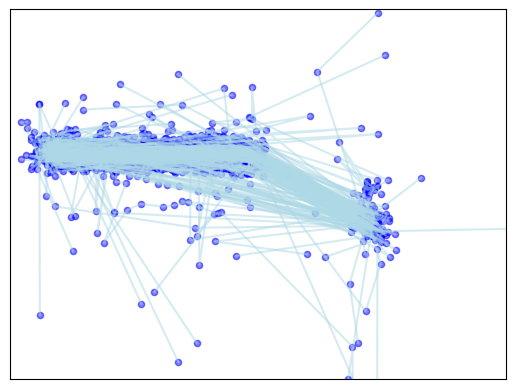

In [445]:
#   DyslexiaDat2.VisScanPath(1,visFix=True,scan_path_col='lightblue', allS=True)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_visuals.py:170: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


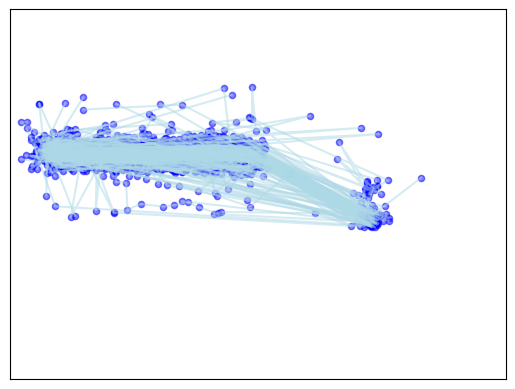

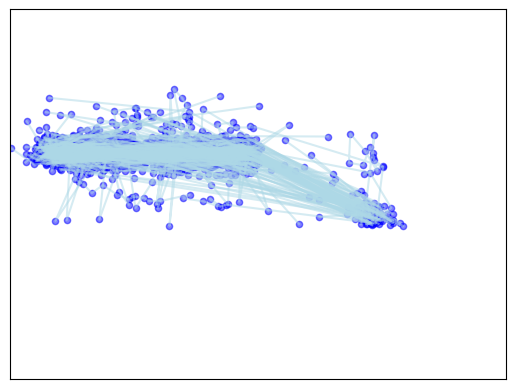

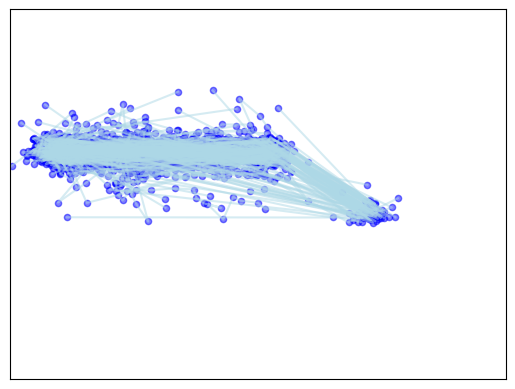

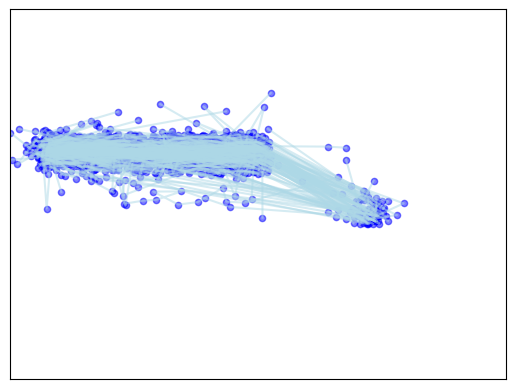

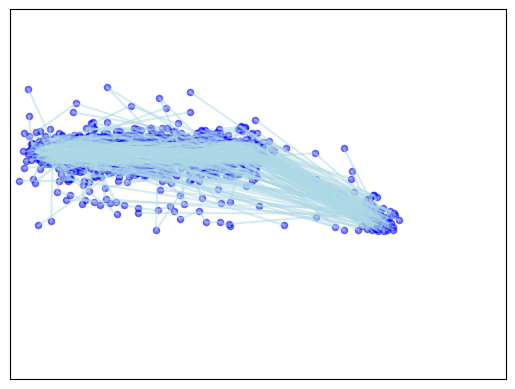

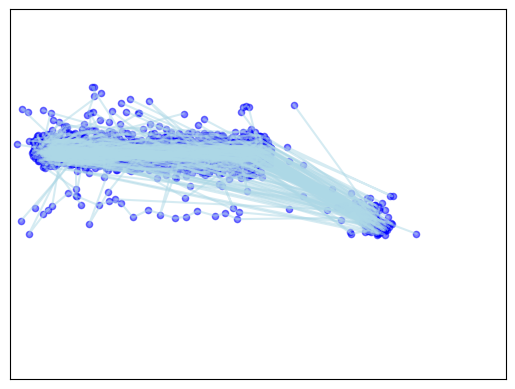

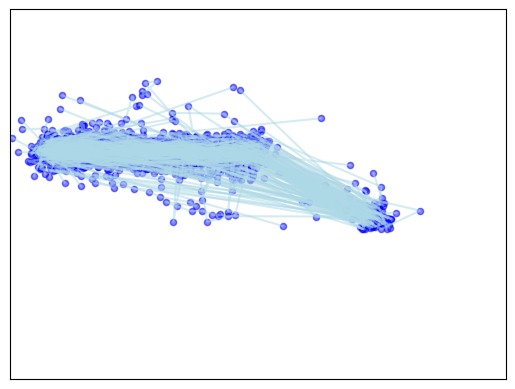

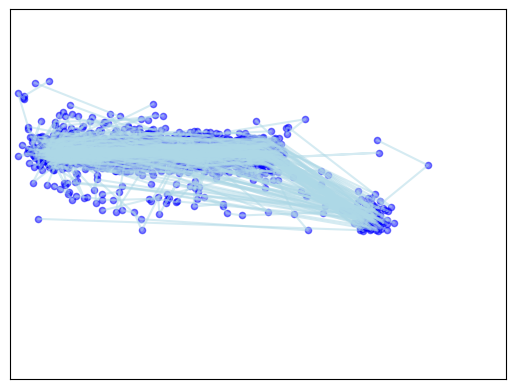

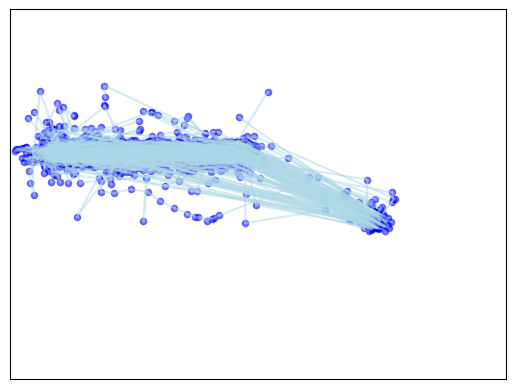

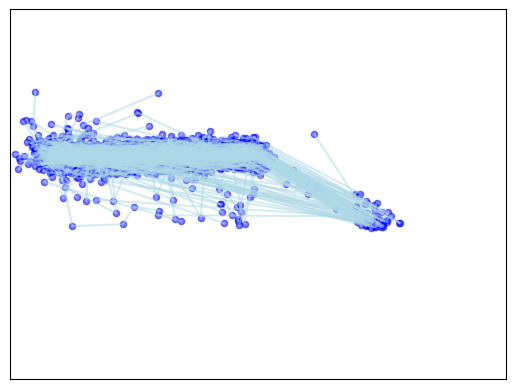

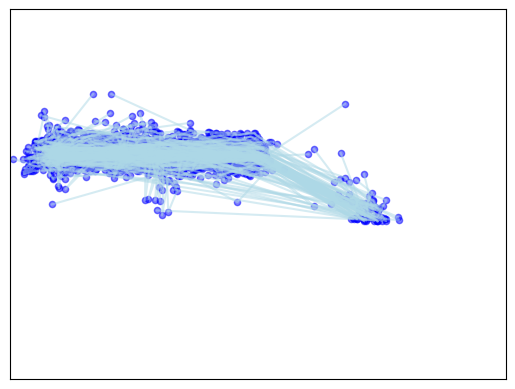

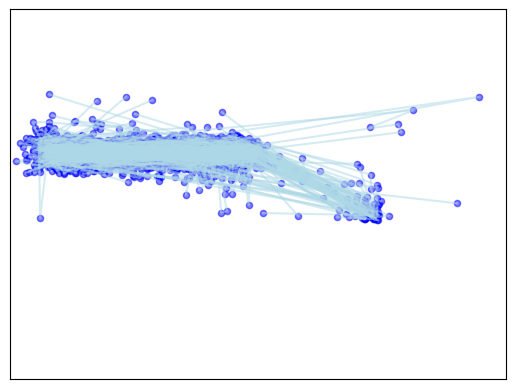

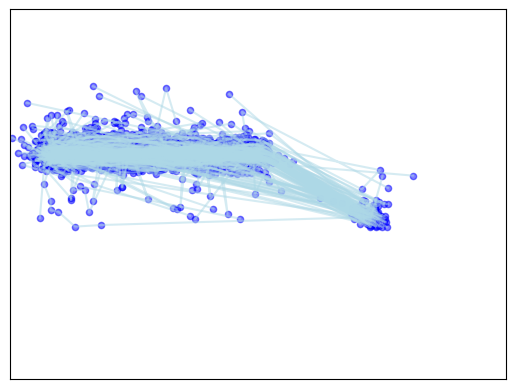

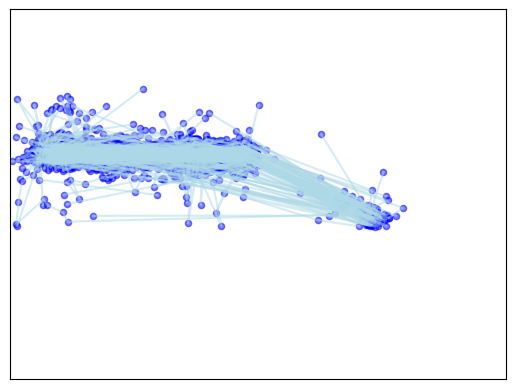

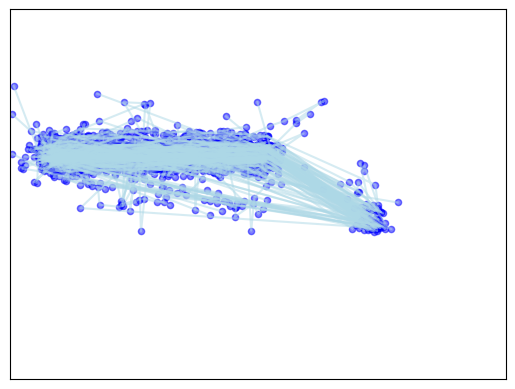

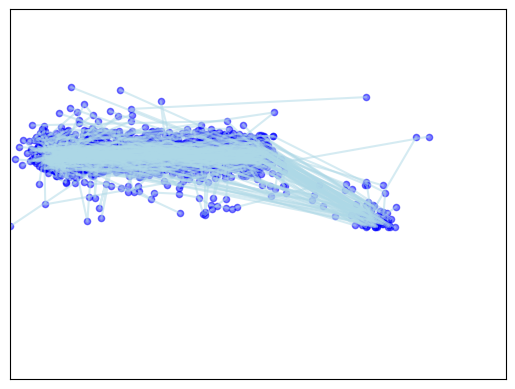

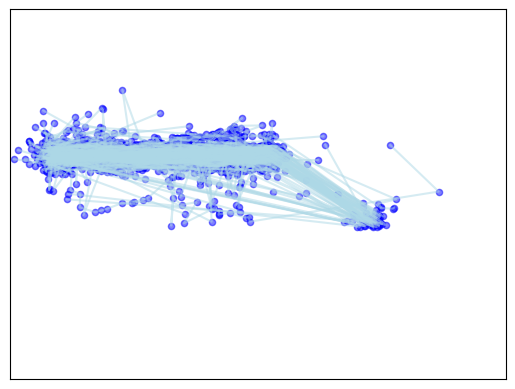

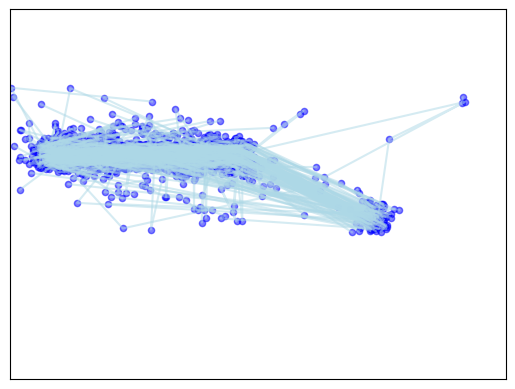

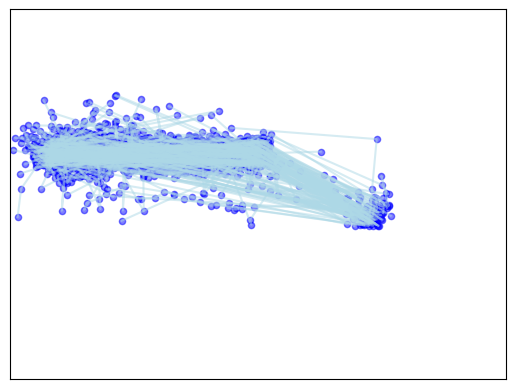

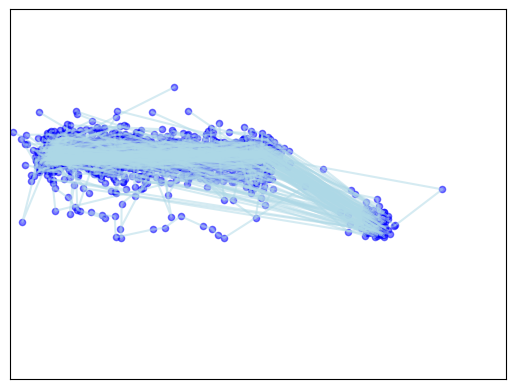

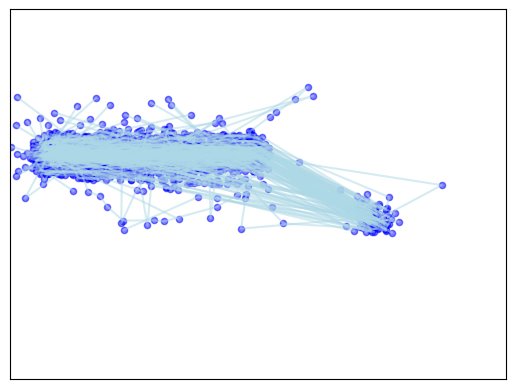

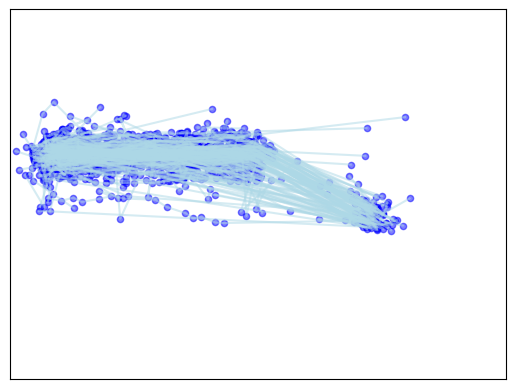

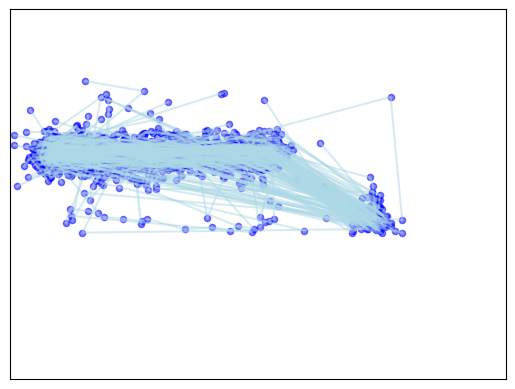

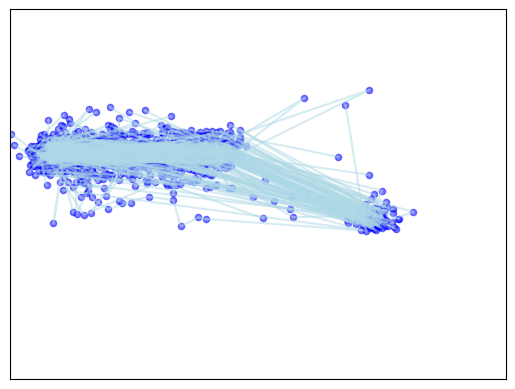

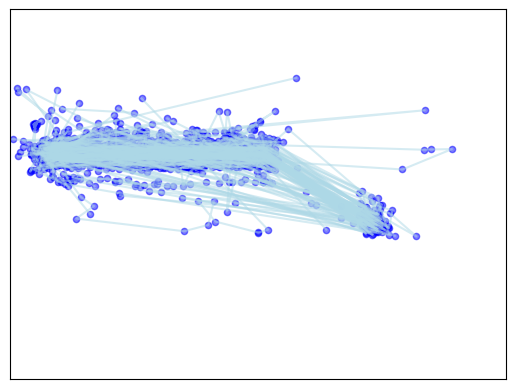

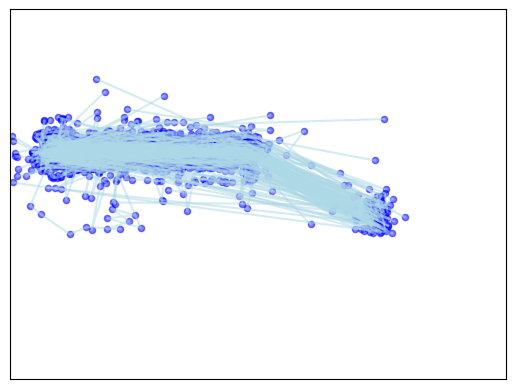

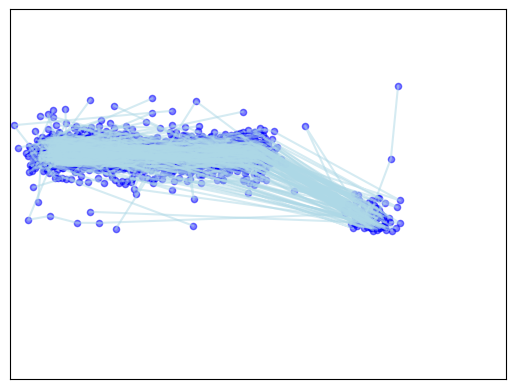

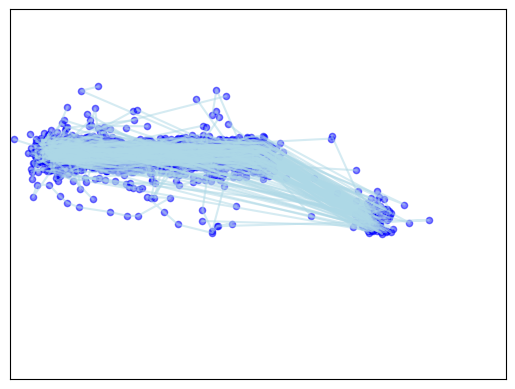

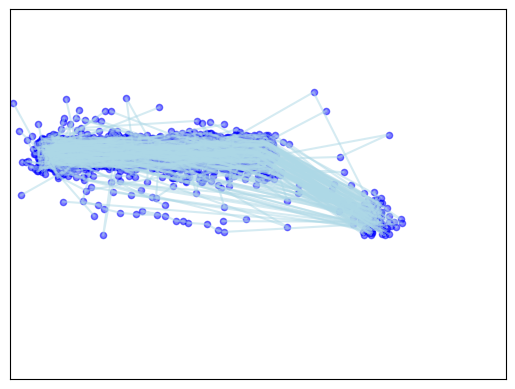

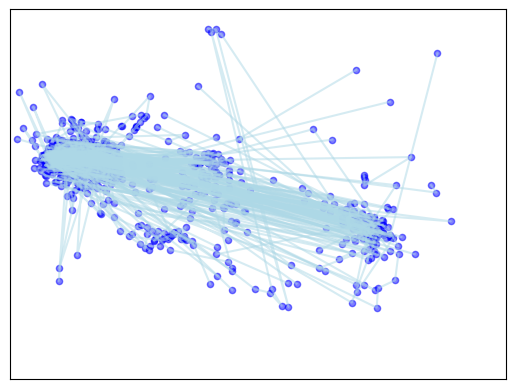

In [531]:
for i in range(1, 31):
    DyslexiaDat2.VisScanPath(i, visFix=True, scan_path_col='lightblue', allS=True)

In [532]:
tot_subj = DyslexiaDat2.subjects

In [533]:
WhichC, WhichCN = DyslexiaDat2.GetGroups('Group')

Conditions [0. 1.]


In [534]:
# amount of subjects of group 0
WhichC[WhichC == 0].shape[0]

60

In [535]:
# amount of subjects of group 1
WhichC[WhichC == 1].shape[0]

23

In [210]:
stim_map = {8881:30, 8882:31, 8883:32, 8884:33, 8885:34, 8886:35}

In [59]:
from copy import deepcopy
def train_HMM(self, test_participants, group, stimuli, n_components, starting_tests, covariance_type):
    models_g0 = []
    models_g1 = []
    for stim in stimuli:
        exclude_subj = []
        try:
            if stim >= 8881:
                exclude_subj = map_stim_subj[stim_map[stim]]
            else:
                exclude_subj = map_stim_subj[stim]
        except:
            pass
        if exclude_subj == []:
            exclude_subj = test_participants
        else:
            exclude_subj = np.concatenate((test_participants, np.array(exclude_subj)))
        with io.capture_output() as _:
            train_model = self.models_pipeline(stim, n_components, group=group, starting_tests=starting_tests, only_starting=True, only_bic=True, covariance_type=covariance_type, remove_subj=exclude_subj)
        models_g0.append(deepcopy(train_model[0][0][0]))
        models_g1.append(deepcopy(train_model[1][0][0]))
        
    return models_g0, models_g1

In [61]:
def evaluation(self, stimuli, models_g0, models_g1, test_participants, test_labels):
    accuracy = []
    conf_matrix = np.zeros((2, 2))
    for idx,subj in enumerate(test_participants):
        # get the group of the subject
        g = test_labels[idx]
        s = np.where(self.subjects == subj)[0][0]
        vote_g0 = 0
        vote_g1 = 0
        for s_idx,stim in enumerate(stimuli):
            x = []
            try:
                if stim >= 8881:
                    x = map_stim_subj[stim_map[stim]]
                else:
                    x = map_stim_subj[stim]
            except:
                pass
            if not subj in x:
                X0, Y0, l0 = self.get_data(stim, subject=int(s))
                res_0 = models_g0[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0
                res_1 = models_g1[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0

                if res_0 < res_1:
                    vote_g0 += 1
                else:
                    vote_g1 += 1

        if vote_g0 == vote_g1 and g == 0:
            accuracy.append(0)
            conf_matrix[1][0] += 1
        elif vote_g0 == vote_g1 and g == 1:
            accuracy.append(1)
            conf_matrix[1][1] += 1
        elif vote_g0 > vote_g1 and g == 0:
            accuracy.append(1)
            conf_matrix[0][0] += 1
        elif vote_g0 > vote_g1 and g == 1:
            accuracy.append(0)
            conf_matrix[0][1] += 1
        elif vote_g0 < vote_g1 and g == 0:
            accuracy.append(0)
            conf_matrix[1][0] += 1
        elif vote_g0 < vote_g1 and g == 1:
            accuracy.append(1)
            conf_matrix[1][1] += 1
        
    return accuracy, conf_matrix

In [ ]:
import json

def convert_to_serializable(obj):
    """
    Convert numpy arrays and other non-serializable objects to lists or basic types
    that can be saved in JSON format.
    """
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, float):
        return float(obj)  # Convert potential numpy float to standard Python float
    elif hasattr(obj, 'tolist'):
        return obj.tolist()
    return str(obj)

def save_ghmm_details(models, stimuli, description, output_file='ghmm_models_details.json'):
    """
    Save Gaussian HMM model details to a JSON file.
    
    Parameters:
    - models: List of fitted Gaussian HMM models
    - stimuli: Corresponding list of stimulus names
    - output_file: Path to the output JSON file
    """
    # Create a list to store model details
    models_details = []

    # Add description
    models_details.append({'description': description})
    models_details.append({'num_stimuli': len(stimuli)})
    
    # Iterate through models and stimuli
    for model, stim in zip(models, stimuli):
        model_info = {
            'stimulus': stim,
            'start_probabilities': convert_to_serializable(model.startprob_),
            'transition_matrix': convert_to_serializable(model.transmat_),
            'means': convert_to_serializable(model.means_),
            'covariances': convert_to_serializable(model.covars_),
            'covariance_type': model.covariance_type,
            'init_params': model.init_params,
            'num_components': model.n_components
        }
        models_details.append(model_info)
    
    # Save to JSON file
    output_file = './hmm_models2/' + output_file
    # Ensure the directory exists
    with open(output_file, 'w') as f:
        json.dump(models_details, f, indent=4, default=convert_to_serializable)
    
    print(f"Model details saved to {output_file}")

## HMM stimuli selection

In this section we separate the stimuli in 5 groups:
- Only Real Words
- Only Pseudowords (1 subset from 1 to 10)
- Only Nonwords
- Only Pseudowords (2 subset from 21 to 30)
- Mixed (Psedowords and Nonwords together)

In [302]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [8881, 8882, 8883, 8884, 8885, 8886]
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    train_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in train_participants])
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    models_g0, models_g1 = train_HMM(DyslexiaDat2, test_participants, [0,1], stimuli, [8], 50, 'tied')
    acc, conf = evaluation(DyslexiaDat2, stimuli, models_g0, models_g1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.7777777777777778
Fold 2 accuracy: 0.6666666666666666
Fold 3 accuracy: 1.0
Fold 4 accuracy: 1.0
Fold 5 accuracy: 0.8888888888888888
Average accuracy: 0.8666666666666668
Standard deviation: 0.12957670877434002
Total confusion matrix:
[[30.  1.]
 [ 5.  9.]]


In [304]:
save_ghmm_details(models_g0, [8881, 8882, 8883, 8884, 8885, 8886],  description='Models trained with practice data of Typical Reader and Isolated Spelling Deficit (5th Fold)', output_file='ghmm_models_g0_practice.json')

Model details saved to ./hmm_models2/ghmm_models_g0_practice.json


In [305]:
save_ghmm_details(models_g1, [8881, 8882, 8883, 8884, 8885, 8886],  description='Models trained with practice data of Combined Reading and Spelling Deficit and Isolated Reading Deficit (5th Fold)', output_file='ghmm_models_g1_practice.json')

Model details saved to ./hmm_models2/ghmm_models_g1_practice.json


#### Calculating and saving the HMM

In [536]:
stimuli = list(range(1,31)) # from 1 to 30
models_g0 = []
models_g1 = []
#Around 80 minutes per fold
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    train_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in train_participants])
    g0, g1 = train_HMM(DyslexiaDat2, test_participants, [0,1], stimuli, [8], 50, 'tied') # better 100 insted of 50 starting tests, improves stability
    models_g0.append(g0)
    models_g1.append(g1)

In [540]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [1,2,3,4,5,6,7,8,9,10] # Only Pseudohomophones
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    m_0 = [models_g0[i][subj-1] for subj in stimuli]
    m_1 = [models_g1[i][subj-1] for subj in stimuli]
    acc, conf = evaluation(DyslexiaDat2, stimuli, m_0, m_1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.5555555555555556
Fold 2 accuracy: 0.5555555555555556
Fold 3 accuracy: 0.5555555555555556
Fold 4 accuracy: 0.7777777777777778
Fold 5 accuracy: 0.4444444444444444
Average accuracy: 0.5777777777777778
Standard deviation: 0.10886621079036347
Total confusion matrix:
[[19.  3.]
 [16.  7.]]


In [541]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [11,12,13,14,15,16,17,18,19,20] # Only Nonwords
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    m_0 = [models_g0[i][subj-1] for subj in stimuli]
    m_1 = [models_g1[i][subj-1] for subj in stimuli]
    acc, conf = evaluation(DyslexiaDat2, stimuli, m_0, m_1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 1.0
Fold 2 accuracy: 0.7777777777777778
Fold 3 accuracy: 0.8888888888888888
Fold 4 accuracy: 0.6666666666666666
Fold 5 accuracy: 1.0
Average accuracy: 0.8666666666666666
Standard deviation: 0.12957670877434002
Total confusion matrix:
[[30.  1.]
 [ 5.  9.]]


In [542]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [21,22,23,24,25,26,27,28,29,30] # Only Pseudohomophones 2
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    m_0 = [models_g0[i][subj-1] for subj in stimuli]
    m_1 = [models_g1[i][subj-1] for subj in stimuli]
    acc, conf = evaluation(DyslexiaDat2, stimuli, m_0, m_1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.8888888888888888
Fold 2 accuracy: 0.8888888888888888
Fold 3 accuracy: 0.6666666666666666
Fold 4 accuracy: 0.5555555555555556
Fold 5 accuracy: 0.8888888888888888
Average accuracy: 0.7777777777777778
Standard deviation: 0.14054567378526128
Total confusion matrix:
[[27.  2.]
 [ 8.  8.]]


In [543]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30] # Mixed
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    m_0 = [models_g0[i][subj-1] for subj in stimuli]
    m_1 = [models_g1[i][subj-1] for subj in stimuli]
    acc, conf = evaluation(DyslexiaDat2, stimuli, m_0, m_1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 1.0
Fold 2 accuracy: 0.8888888888888888
Fold 3 accuracy: 0.8888888888888888
Fold 4 accuracy: 0.6666666666666666
Fold 5 accuracy: 1.0
Average accuracy: 0.888888888888889
Standard deviation: 0.12171612389003693
Total confusion matrix:
[[31.  1.]
 [ 4.  9.]]


In [544]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [1,2,3,4,5,6,7,8,9,10,21,22,23,24,25,26,27,28,29,30] # Pseudohomophones + Pseudohomophones 2
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    m_0 = [models_g0[i][subj-1] for subj in stimuli]
    m_1 = [models_g1[i][subj-1] for subj in stimuli]
    acc, conf = evaluation(DyslexiaDat2, stimuli, m_0, m_1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.8888888888888888
Fold 2 accuracy: 0.8888888888888888
Fold 3 accuracy: 0.6666666666666666
Fold 4 accuracy: 0.8888888888888888
Fold 5 accuracy: 0.6666666666666666
Average accuracy: 0.7999999999999999
Standard deviation: 0.10886621079036347
Total confusion matrix:
[[28.  2.]
 [ 7.  8.]]


In [545]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = list(range(1,31)) # All stimuli
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    m_0 = [models_g0[i][subj-1] for subj in stimuli]
    m_1 = [models_g1[i][subj-1] for subj in stimuli]
    acc, conf = evaluation(DyslexiaDat2, stimuli, m_0, m_1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 1.0
Fold 2 accuracy: 0.8888888888888888
Fold 3 accuracy: 1.0
Fold 4 accuracy: 0.8888888888888888
Fold 5 accuracy: 0.7777777777777778
Average accuracy: 0.9111111111111111
Standard deviation: 0.08314794192830981
Total confusion matrix:
[[32.  1.]
 [ 3.  9.]]


In [546]:
save_ghmm_details(models_g0[2], list(range(1,31)),  description='Models trained with data of Typical Reader and Isolated Spelling Deficit (3rd Fold)', output_file='ghmm_models_g0.json')

Model details saved to ./hmm_models2/ghmm_models_g0.json


In [547]:
save_ghmm_details(models_g1[2], list(range(1,31)),  description='Models trained with data of Combined Reading and Spelling Deficit and Isolated Reading Deficit (3rd Fold)', output_file='ghmm_models_g1.json')

Model details saved to ./hmm_models2/ghmm_models_g1.json


In [548]:
import pickle
def save_ghmm_models(models, stimuli, folds, output_file):
    """
    Save Gaussian HMM model using pickle.

    Parameters:
    - models: List of fitted Gaussian HMM models
    - output_file: Path to the output pickle file
    """
    for f in range(folds):
        for stim in stimuli:
            with open(f'./hmm_models2/{output_file}/{output_file}_fold_{f+1}_stim_{stim}.pkl', 'wb') as file:
                pickle.dump(models[f][stim-1], file)
    print(f"Model details saved to {output_file}")

In [549]:
save_ghmm_models(models_g0, list(range(1,31)), 5, output_file='models_g0')
save_ghmm_models(models_g1, list(range(1,31)), 5, output_file='models_g1')

Model details saved to models_g0
Model details saved to models_g1


In [556]:
# try to load the models
path = './hmm_models2/models_g0/models_g0_fold_1_stim_1.pkl' 
with open(path, 'rb') as file:
    model = pickle.load(file)
    print(model)
    print(model.startprob_)
    print(model.transmat_)
    print(model.means_)
    print(model.covars_)
    print(model.covariance_type)
    print(model.init_params)
    print(model.n_components)

GaussianHMM(covariance_type='tied', n_components=8)
[8.98991719e-11 8.98365081e-15 3.33333333e-02 5.23945435e-33
 2.03178903e-01 1.36023579e-09 7.63487756e-01 6.46586085e-09]
[[6.77435734e-01 2.40351630e-02 9.51786928e-03 2.83325153e-01
  3.75449651e-03 1.87753431e-08 3.95930596e-04 1.53563451e-03]
 [3.54842572e-01 6.44866336e-01 1.21040104e-05 1.04117255e-04
  6.26720753e-12 5.38794593e-14 1.68435167e-04 6.43543022e-06]
 [3.94000609e-11 1.57997937e-02 4.46763102e-01 4.54937728e-02
  2.09868698e-01 3.94067736e-03 2.11700277e-01 6.64336794e-02]
 [1.53432683e-07 7.20309166e-20 6.15035131e-11 8.10735156e-01
  9.17193993e-09 1.89264681e-01 5.87873973e-16 4.92104979e-14]
 [2.10198475e-02 1.40771128e-05 1.91850636e-04 7.33826341e-02
  1.80778885e-02 1.41966463e-05 8.31191514e-01 5.61079918e-02]
 [2.06866863e-09 8.98485579e-20 6.50559515e-17 3.32624791e-06
  1.78755589e-07 6.33011493e-01 4.74307460e-10 3.66984999e-01]
 [1.47010756e-05 1.19693231e-01 3.62491406e-35 8.70478988e-10
  1.83783042e

In [306]:
from PyEyeSim.visualhelper import draw_ellipse

def VisHMM(self,dat,hmmfitted,ax=0,showim=0,stim=1,lengths=0,incol=False):
    '''
     visualize fixations and fitted hidden markov model
    hmmfitted: fitted hidden markov model
    ax: if not provided, new figure opens 

    
     Positional arguments
     ----------
    dat : sequence of fixations
    hmmfitted : fitted hmmlearn hidden markov model object

    
     Optional arguments
     ----------
    ax:  provide axis handle for the plot, if not new figure is opened The default is 0.
    showim : show stimulus if True The default is 1.
    stim : stimulus name
    lengths : length of time series sequences (needed for multiple sequences)
    incol : If True, use sequence of colorsm differing for each component. The default is False.

    Returns
    -------
    None.

    '''
    
    colors=['k','gray','salmon','olive','m','c','g','y','navy','orange','darkred','r','darkgreen','k','gray','salmon','olive','y','m','g','c']
    if type(ax)==int:
       fig,ax= plt.subplots()
    if showim:
        ax.imshow(self.images[stim])
        alph=.8
    else:
        alph=.8
    if np.shape(dat)[0]>200:
        alph=.6

    preds=hmmfitted.predict(dat,lengths)

    ax.scatter(hmmfitted.means_[:,0],hmmfitted.means_[:,1],color='darkred',s=50)
    
    for c1 in range(hmmfitted.n_components):
        if incol:
            color1=colors[c1]  # color for scatter 
            color2=colors[c1] # color for patch

        else:
            color1='k'
            color2='olive'

        ax.scatter(dat[preds==c1,0],dat[preds==c1,1],color=color1,alpha=alph)
        #print(np.shape(hmmfitted.covars_[c1]))
       # draw_ellipse((hmmfitted.means_[c1,0],hmmfitted.means_[c1,1]),hmmfitted.covars_[c1],ax=ax,facecolor='none',edgecolor=color2,linewidth=2)
        draw_ellipse(hmmfitted.means_[c1,0],hmmfitted.means_[c1,1],hmmfitted.covars_[c1],ax=ax,facecolor='none',edgecolor=color2,linewidth=2)

        for c2 in range(hmmfitted.n_components):
            if c1!=c2:
                ax.plot([hmmfitted.means_[c1,0],hmmfitted.means_[c2,0]],[hmmfitted.means_[c1,1],hmmfitted.means_[c2,1]],linewidth=hmmfitted.transmat_[c1,c2]*5,color='r')
    ax.set_ylim([self.y_size,0])
    ax.set_xlim([0,self.x_size])
    ax.set_yticks([])
    ax.set_xticks([])

In [356]:

def VisScanPathMod(self, stimn, ax=None, alpha=0.5, allS=True, fixation_col='black', visFix=False, num_fixations=None,center=False):
    ''' 
    Description: Visualize scan path for a given stimulus.
    
    
     Positional arguments
     ----------
    stimn: stimulus index.
    
    Optional arguments
    ----------
    ax: if not provided, a new figure is created.
    alpha: Transparency level for scan path. Defaults to 0.5.
    allS:  Default=True, visualize scan paths for all participants; otherwise specify participant index.
    scan_path_col: Color for the scan path. Defaults to 'salmon'.
    fixation_col: Color for fixation points. Defaults to 'blue'.
    VisFix: Default=False. If True, Visualize fixations with scatter points.
    num_fixations: Number of fixations to visualize. If not provided all fixations will be enumerated.
    Returns:
    '''
    if ax is None:
        fig, ax = plt.subplots()
    if center:
        if hasattr(self,'images'):
            xs1=(self.x_size-np.shape(self.images[self.stimuli[stimn]])[1])/2
            xs2=self.x_size-xs1
            ys1=(self.y_size-np.shape(self.images[self.stimuli[stimn]])[0])/2
            ys2=self.y_size-ys1
            ax.imshow(self.images[self.stimuli[stimn]],extent=[xs1,xs2,ys2,ys1])
    else:
        if hasattr(self,'images'):
            ax.imshow(self.images[self.stimuli[stimn]])

    if type(allS) == bool:
        for cs in range(self.ns):
            fixx, fixy = self.GetFixationData(self.subjects[cs], self.stimuli[stimn])
            if cs < 117:
                scan_path_col = 'salmon'
            else:
                scan_path_col = 'blue'
            ax.plot(fixx, fixy, alpha=alpha, color=scan_path_col)
            if visFix:
                ax.scatter(fixx, fixy, color=fixation_col, alpha=alpha, s=20)

            # Enumerate all fixations by default
           # num_fixations = len(fixx) if num_fixations is None else num_fixations

            #for i, (x, y) in enumerate(zip(fixx[:num_fixations], fixy[:num_fixations])):
             #   ax.text(x, y, str(i + 1), color="white", fontsize=10, ha='center', va='center')

    else:
        fixx, fixy = self.GetFixationData(self.subjects[allS], self.stimuli[stimn])
        ax.plot(fixx, fixy, alpha=alpha, color=scan_path_col)
        if visFix:
            ax.scatter(fixx, fixy, color=fixation_col, alpha=alpha, s=20)

        # Enumerate all fixations by default
  #      num_fixations = len(fixx) if num_fixations is None else num_fixations

#        for i, (x, y) in enumerate(zip(fixx[:num_fixations], fixy[:num_fixations])):
 #           ax.text(x, y, str(i + 1), color="white", fontsize=10, ha='center', va='center')

    ax.set_xlim([0, self.x_size])
    ax.set_ylim([self.y_size, 0])
    ax.set_xticks([])
    ax.set_yticks([])

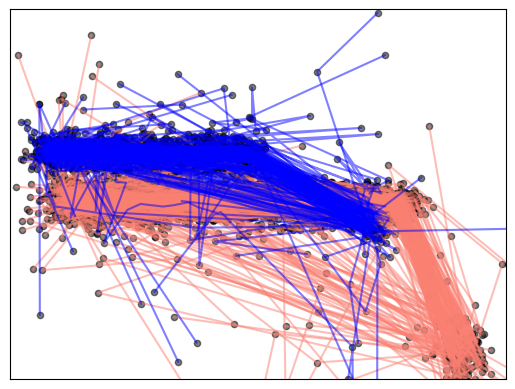

In [406]:
VisScanPathMod(DyslexiaDat, 1, visFix=True, allS=True)

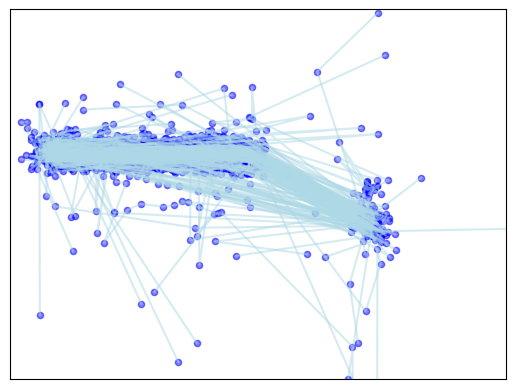

In [407]:
DyslexiaDat2.VisScanPath(1,visFix=True,scan_path_col='lightblue', allS=True)

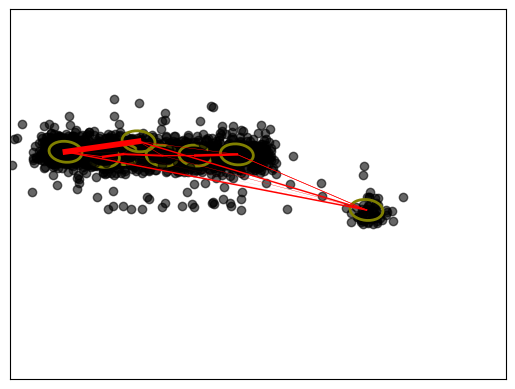

In [555]:
stim = 1
xx,yy,lengths,_=DyslexiaDat2.DataArrayHmm(stim,group=0,tolerance=20,verb=False)
Dat=np.column_stack((xx,yy))
VisHMM(DyslexiaDat2,Dat,models_g0[0][stim-1],ax=0,showim=0,stim=stim,lengths=lengths)

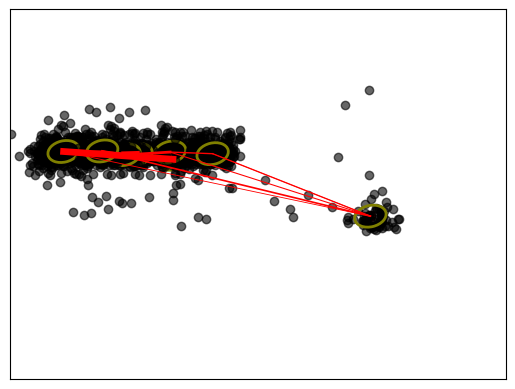

In [554]:
stim = 25
xx,yy,lengths,_=DyslexiaDat2.DataArrayHmm(stim,group=0,tolerance=20,verb=False)
Dat=np.column_stack((xx,yy))
VisHMM(DyslexiaDat2,Dat,models_g0[0][stim-1],ax=0,showim=0,stim=stim,lengths=lengths)

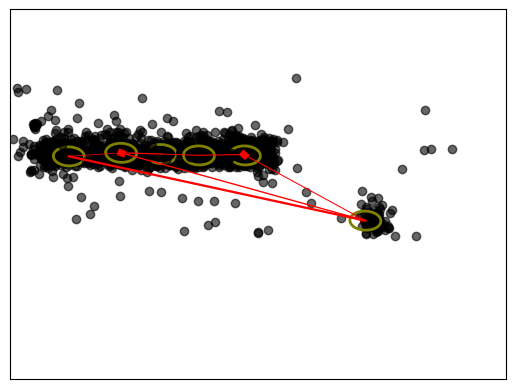

In [553]:
stim = 26
xx,yy,lengths,_=DyslexiaDat2.DataArrayHmm(stim,group=0,tolerance=20,verb=False)
Dat=np.column_stack((xx,yy))
VisHMM(DyslexiaDat2,Dat,models_g1[0][stim-1],ax=0,showim=0,stim=stim,lengths=lengths)

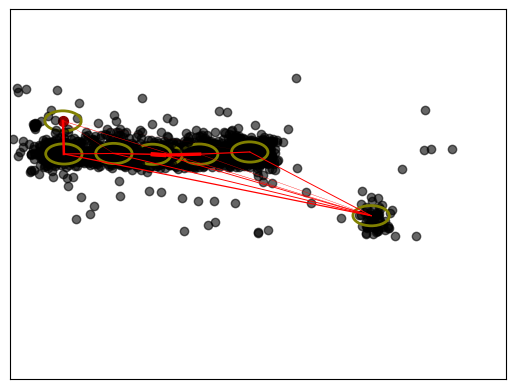

In [552]:
stim = 26
xx,yy,lengths,_=DyslexiaDat2.DataArrayHmm(stim,group=0,tolerance=20,verb=False)
Dat=np.column_stack((xx,yy))
VisHMM(DyslexiaDat2,Dat,models_g0[0][stim-1],ax=0,showim=0,stim=stim,lengths=lengths)

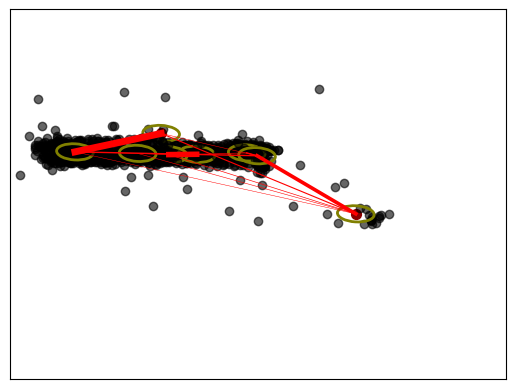

In [550]:
stim = 1
file = f'./hmm_models2/models_g1/models_g1_fold_1_stim_{stim}.pkl'
with open(file, 'rb') as f:
    model = pickle.load(f)
xx,yy,lengths,_=DyslexiaDat2.DataArrayHmm(stim,group=1,tolerance=20,verb=False)
Dat=np.column_stack((xx,yy))
VisHMM(DyslexiaDat2,Dat,model,ax=0,showim=0,stim=stim,lengths=lengths)